In [109]:
# Final Version: Non interactive Plotly
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import ppscore as pps
%matplotlib inline

os.chdir('/Users/bmr225/Documents/DS_projects')

In [110]:
# To hide all the warnings in Python
import warnings
warnings.filterwarnings('ignore')

## INTRODUCTION
Over 370000 used cars scraped with Scrapy from Ebay-Kleinanzeigen. The content of the data is in German. The autos dataset download from Kaggle. Link: https://www.kaggle.com/orgesleka/used-cars-database/kernels

Several questions can be asked while exploring the dataset such as:

### Q1 Can we predict the prices of the cars based on its criteria? (Predictive Modeling)
We are going to build a predictive model of the car prices based on the descriptions provided in the ads.

### Q2 what is the most popular car brands in the market (Germany) ? (Quantitative Data Analysis & Data Visualization)
By computing the frequency of the ads of different car brands, we can get an idea of the popular cars in the German market.

### Q3 How do the used cars ads cluster together? (Clustering/Segmentation Analysis)
Do the cars cluster based on their prices, brands, mileage?

In [111]:
# Load the data
autos = pd.read_csv('/Users/bmr225/Documents/PythonCodes/TDS_tutorials/autos.csv', encoding = 'Latin-1')

In [112]:
# Check the first 5 observations from the data
autos.head(5)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


## I. Quick Data Inspection

In [113]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

### A quick inspection of the columns of the dataset reveals the following:
- Date Crawled and Date lastSeen are to be removed as they are not related to the prediction of price 
- Month of registration also is data that has little to do with the price of the used car
- nrOfPictures also will be removed as it has little to do with the prediction of price
- Name of the car should be removed as well as this information is conveyed through Brand and Model
- Postal Code to be converted to a categorical value
- 'Age of the car' can be extracted from year of registration an datecreated as the Year as numerical variable can be misleading to be used as it is in a prediction problem and further transformation needs to be performed
- Columns like Price and Odometer should be numerical and not object.. They need to be cleaned of the string features
- Date columns such as 'dateCreated' needs to be converted to datetime columns and checked for outliers erroneous values before computation of 'Age of the car'

## II. Data Cleaning

### A. Date Columns Format and Extraction of 'Age of the Car' from 'yearOfRegistration' and 'Year_created': Feature Engineering I

Before computing age of the car, a careful inspection of dateCreated and yearOfRegistration is required. Therefore, converting 

In [114]:
# Datetime format
import time
cols = ['dateCreated']
for col in cols:
    autos[col]= autos[col].apply(lambda x: x[:10])# removing the time.. 
    autos[col]= pd.to_datetime(autos[col])

(array([16587., 16617., 16648., 16679., 16709., 16740., 16770., 16801.,
        16832., 16861., 16892.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

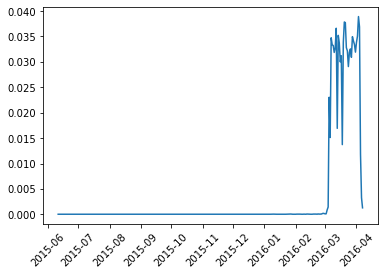

In [115]:
# dateCreated
date_s = autos['dateCreated'].value_counts(normalize=True, dropna = False).sort_index()
plt.plot((date_s.index),date_s.to_list())
plt.xticks(rotation=45)

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

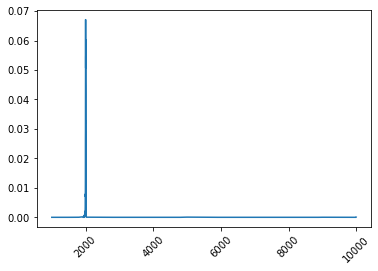

In [116]:
# Registration Year
date_s = autos['yearOfRegistration'].value_counts(normalize=True, dropna = False).sort_index()
plt.plot((date_s.index),date_s.to_list())
plt.xticks(rotation=45)

Based on the plot above, it seems that there are erroneous values in 'yearOfRegistration' that we would need to clean.
- No value should be > 2016 as it is the year of Scraping the ads.
- Elimination of very old cars <1980 as too old car values will be values as an antique and won't follow the current model

In [117]:
autos_df = autos[autos['yearOfRegistration'].between(1980,2016)]
display(autos_df.shape)
# from 1980: 47492 entries left

(47492, 20)

(array([1975., 1980., 1985., 1990., 1995., 2000., 2005., 2010., 2015.,
        2020.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

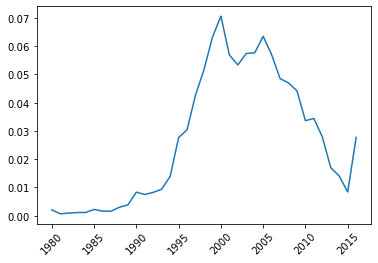

In [118]:
# Visualizing the range of Year of Registration 
date_s = autos_df['yearOfRegistration'].value_counts(normalize=True, dropna = False).sort_index()
plt.plot((date_s.index),date_s.to_list())
plt.xticks(rotation=45)

###  Extracting Age of the car feature

In [119]:
# First, computing 'Age Car' and adding 
autos_df['Year_created'] = pd.DatetimeIndex(autos_df['dateCreated']).year
autos_df['Age_Car'] = autos_df['Year_created']- autos_df['yearOfRegistration']

### B. Dropping Irrelevant Columns

In [120]:
# Removing the six columns mentioned above
autos_df.drop(['name','dateCrawled','lastSeen','nrOfPictures','monthOfRegistration','Year_created','yearOfRegistration','dateCreated'],axis=1,inplace = True)

### C. Fixing names of the columns

In [121]:
# Replaces all spaces with underscores
autos_df.rename(columns={'notRepairedDamage':'unrepaired_damage',                                    
                      'vehicleType':'vehicle_type',
                      'offerType': 'offer_type',
                      'fuelType': 'fuel_type',
                      'postalCode': 'postal_code'}, inplace=True)

### D.  Translation of categories of the categorical columns from German to English

In [122]:
cat_cols = ['abtest','vehicle_type','seller','gearbox','unrepaired_damage','offer_type']

for col in cat_cols:    
    display(autos_df[col].unique())


array(['control', 'test'], dtype=object)

array(['bus', 'limousine', 'kleinwagen', 'kombi', nan, 'coupe', 'suv',
       'cabrio', 'andere'], dtype=object)

array(['privat', 'gewerblich'], dtype=object)

array(['manuell', 'automatik', nan], dtype=object)

array(['nein', nan, 'ja'], dtype=object)

array(['Angebot', 'Gesuch'], dtype=object)

In [123]:
# Translation
autos_df['seller'] = autos_df['seller'].str.replace('privat','private').replace('gewerblich','commercial')
autos_df['vehicle_type'] = autos_df['vehicle_type'].str.replace('Kombi','combi').replace('kleinwagen','small car').replace('cabrio','convertible').replace('andere','Other')
autos_df['gearbox'] =autos_df['gearbox'].str.replace('manuell','manual').replace('automatik','automatic')
autos_df['unrepaired_damage']= autos_df['unrepaired_damage'].str.replace('nein','no').replace('ja', 'yes')
autos_df['offer_type']= autos_df['offer_type'].str.replace('Angebot','offer').replace('Gesuch', 'searched')
autos_df['fuel_type']= autos_df['fuel_type'].str.replace('benzin','gasoline').replace('elektro','electric').replace('andere','other')

### E. Cleaning numerical columns and converting them to either float or int

In [124]:
# Removing the $ from the price string and converting it to float
autos_df["price"] = autos_df["price"].str.replace('$','').str.replace(',','').astype(float)
autos_df.rename({'price':'price_dollars'}, axis =1, inplace = True)

# Removing the km from the odometer string and converting it to float
autos_df["odometer"] = autos["odometer"].str.replace('km','').str.replace(',','').astype(float)
autos_df.rename({'odometer':'odometer_km'}, axis =1, inplace = True)

### F. Removing Duplicates data

In [125]:
if autos_df.duplicated().any():
   autos_df.drop_duplicates(inplace = True)

autos_df.shape
# Almost 319 entries were duplicates

(47173, 14)

### G. Missing Values

In [126]:
# Imputation Function: The decision to use or not after inspecting the missing values
from sklearn.impute import SimpleImputer

cols = list(autos.columns)
nan_cols_ind = [cols.index(col) for col in cols if autos[col].isnull().any()]


def impute_cols(df,inds,cols):
    
    df_array = df.iloc[:,:].values
    
    for ind in inds:
        if df.iloc[:,ind].dtype =='O': # categorical column
           imputer = SimpleImputer(missing_values = np.nan ,strategy='most_frequent')
        elif df.iloc[:,ind].dtype =='float64'| df.iloc[:,ind].dtype =='int64':
            imputer = SimpleImputer(missing_values = np.nan ,strategy='mean')
           
        df_array[:,ind] = imputer.fit_transform(df_array[:,ind].reshape(-1,1)).flatten()
               
    return df_array # numpy array

<AxesSubplot:>

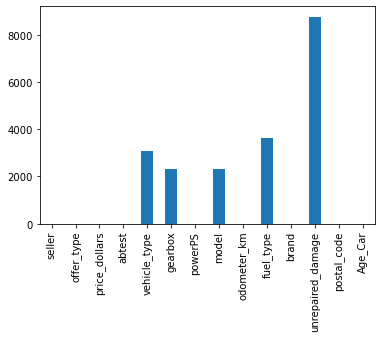

In [127]:
autos_df.isnull().sum().plot(kind = 'bar')

Most of the missing data are in categorical columns.

Imputing those categorical columns based on 'most frequent' category might introduce noise to the model and lead to erroneous prediction. 'Unrepaired damage' column is the most with missing data (18.6%)

We could propose 2 solutions:
- Solution I where 'Unrepaired damage'is kept.. so the number of observations used for predictions will be reduced.
- Solution II where 'Unrepaired damage' is eliminated 


### Model I: Brute Force elimination of all missing rows

In [128]:
autos_df_1 = autos_df.copy()
autos_df_1.dropna(inplace = True)
autos_df_1.shape
# around 13,000 observations were eliminated 

(34521, 14)

### Model II: Eliminating of columns with high number of missing values: 'Unrepaired damage', then removing na rows from other columns just to end up with some extra data

In [129]:
autos_df_2 = autos_df.copy()
autos_df_2.drop(['unrepaired_damage'], axis = 1, inplace = True)
autos_df_2.dropna(inplace = True)
autos_df_2.shape

(39727, 13)

In [130]:
autos_df_1.head()

,seller,offer_type,price_dollars,abtest,vehicle_type,gearbox,powerPS,model,odometer_km,fuel_type,brand,unrepaired_damage,postal_code,Age_Car
0,private,offer,5000.0,control,bus,manual,158,andere,150000.0,lpg,peugeot,no,79588,12
1,private,offer,8500.0,control,limousine,automatic,286,7er,150000.0,gasoline,bmw,no,71034,19
2,private,offer,8990.0,test,limousine,manual,102,golf,70000.0,gasoline,volkswagen,no,35394,7
3,private,offer,4350.0,control,small car,automatic,71,fortwo,70000.0,gasoline,smart,no,33729,9
4,private,offer,1350.0,test,kombi,manual,0,focus,150000.0,gasoline,ford,no,39218,13


### H. Outlier Detection & Handling

In [131]:
import numpy as np
def find_IQR(col):
    
    lower_bound = np.percentile(col,25,axis = 0)
    upper_bound = np.percentile(col,75, axis = 0)
      
    return lower_bound, upper_bound, (upper_bound - lower_bound)

def outliers_clean(df,col):
    
    Q1, Q3, iqr = find_IQR(df[col])
    
    if sum(list(df[col]< Q1 - 1.5*Q1)): 
       df.loc[(df[col] < Q1 - 1.5*Q1), col]= Q1 - 1.5*Q1
    
    if sum(list(df[col] > Q3 + 1.5*Q3)): 
         df.loc[(df[col] > Q3 + 1.5*Q3), col]= Q3 +  1.5*Q3 
            
    return df
# However, outliers_clean is not our algorithm of choice here in order to not introduce noise and inaccuracy to our model

## Solution I

## EDA of numerical data

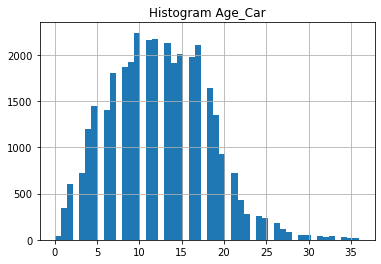

In [132]:
# Age_Car
autos_df_1['Age_Car'].hist(bins=50)
plt.title('Histogram Age_Car')
plt.show()

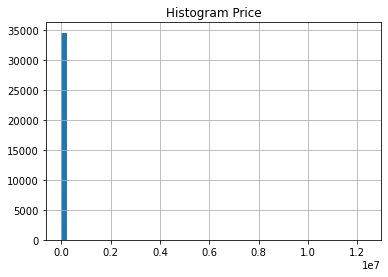

count    3.452100e+04
mean     7.069102e+03
std      6.748501e+04
min      0.000000e+00
25%      1.500000e+03
50%      3.800000e+03
75%      8.500000e+03
max      1.234568e+07
Name: price_dollars, dtype: float64

In [133]:
# price_dollars
autos_df_1['price_dollars'].hist(bins=50)
plt.title('Histogram Price')
plt.show()
autos_df_1['price_dollars'].describe() 

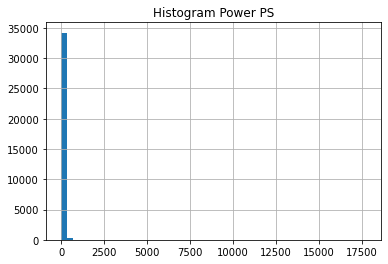

count    34521.000000
mean       127.486863
std        183.576809
min          0.000000
25%         80.000000
50%        116.000000
75%        150.000000
max      17700.000000
Name: powerPS, dtype: float64

In [134]:
# powerPS
autos_df_1['powerPS'].hist(bins=50)
plt.title('Histogram Power PS')
plt.show()

autos_df_1['powerPS'].describe()

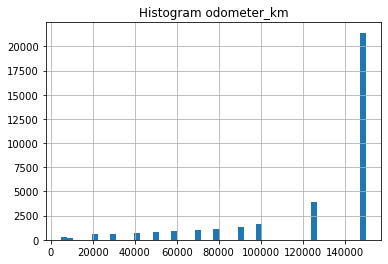

count     34521.000000
mean     124495.814142
std       39491.260619
min        5000.000000
25%      100000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64

In [135]:
# odometer_km
autos_df_1['odometer_km'].hist(bins=50)
plt.title('Histogram odometer_km')
plt.show()

autos_df_1['odometer_km'].describe() 

The histogram plots of 'price_dollars' and 'powerPS', in addition to basic statistical info about the columns suggested the existence of some erroneous data and outliers that need manual inspection in these 2 columns.

Let's manually inspect them before blindly applying the function.

### Manual Inspection of 'Price Dollars'

In [136]:
# Inspection of the max entry in the column of ['price_dollars']
autos_df_1[autos_df_1['price_dollars'] == np.max(autos_df_1['price_dollars'])]

,seller,offer_type,price_dollars,abtest,vehicle_type,gearbox,powerPS,model,odometer_km,fuel_type,brand,unrepaired_damage,postal_code,Age_Car
47598,private,offer,12345678.0,control,limousine,manual,101,vectra,150000.0,gasoline,opel,no,4356,15


It is obvious from the price (12345678) that it is erroneous.. This observation will be eliminated.

In [137]:
autos_df_1 = autos_df_1[~(autos_df_1['price_dollars'] == np.max(autos_df_1['price_dollars']))]

In [138]:
autos_df_1['price_dollars'].describe() 

count     34520.000000
mean       6711.668511
std       11994.552843
min           0.000000
25%        1500.000000
50%        3800.000000
75%        8500.000000
max      999999.000000
Name: price_dollars, dtype: float64

In [139]:
autos_df_1[autos_df_1['price_dollars'] > 100000]

,seller,offer_type,price_dollars,abtest,vehicle_type,gearbox,powerPS,model,odometer_km,fuel_type,brand,unrepaired_damage,postal_code,Age_Car
514,private,offer,999999.0,test,kombi,manual,101,focus,125000.0,gasoline,ford,no,12205,7
1878,private,offer,129000.0,control,coupe,manual,408,911,125000.0,gasoline,porsche,no,70180,21
2454,private,offer,137999.0,control,coupe,manual,435,911,20000.0,gasoline,porsche,no,80636,6
2751,private,offer,120000.0,control,coupe,manual,286,911,125000.0,gasoline,porsche,no,25488,18
7402,private,offer,115000.0,test,convertible,automatic,400,911,5000.0,gasoline,porsche,no,51379,0
8232,private,offer,128000.0,test,coupe,manual,286,911,100000.0,gasoline,porsche,no,81543,19
11433,private,offer,175000.0,test,coupe,automatic,610,andere,5000.0,gasoline,audi,no,94244,0
12682,private,offer,265000.0,control,coupe,automatic,500,911,5000.0,gasoline,porsche,no,70193,0
14268,private,offer,135000.0,test,coupe,manual,435,911,30000.0,gasoline,porsche,no,83684,6
17140,private,offer,180000.0,test,convertible,automatic,571,andere,50000.0,gasoline,mercedes_benz,no,14193,4


In [140]:
# It seems that price of 999999 and 999990 are erroneous. 
autos_df_1 = autos_df_1[~(autos_df_1['price_dollars'] >900000)]

In [141]:
# Min: Now min of 'Price Dollars' is 0! Which is definitely wrong data...
autos_df_1[autos_df_1['price_dollars'] == 0]

,seller,offer_type,price_dollars,abtest,vehicle_type,gearbox,powerPS,model,odometer_km,fuel_type,brand,unrepaired_damage,postal_code,Age_Car
80,private,offer,0.0,control,coupe,manual,99,primera,150000.0,gasoline,nissan,yes,66903,17
99,private,offer,0.0,control,convertible,manual,0,2_reihe,60000.0,diesel,peugeot,no,99735,5
118,private,offer,0.0,control,bus,manual,204,sharan,150000.0,gasoline,volkswagen,yes,15370,15
248,private,offer,0.0,test,kombi,manual,0,passat,150000.0,gasoline,volkswagen,yes,34369,18
418,private,offer,0.0,test,bus,manual,80,andere,5000.0,diesel,fiat,no,35315,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48891,private,offer,0.0,test,kombi,automatic,143,e_klasse,150000.0,diesel,mercedes_benz,yes,38442,15
49350,private,offer,0.0,control,small car,manual,54,golf,150000.0,diesel,volkswagen,no,29664,25
49479,private,offer,0.0,control,limousine,manual,101,a4,150000.0,gasoline,audi,no,27753,21
49504,private,offer,0.0,control,bus,manual,101,meriva,150000.0,lpg,opel,yes,27432,12


In [142]:
Q1, Q3, iqr = find_IQR(autos_df_1['price_dollars'])
print (Q1)
print (Q3)
print (Q1-1.5*iqr)
print (Q3+1.5*iqr) 

1500.0
8500.0
-9000.0
19000.0


A conservative approach would be to eliminate those 0 erroneous entries.. Another approach to try out is to use KNN regression 
to estimate those values based on other numerical features.However, we are after modeling 'price' and therefore the conservative approach of removing those 0 is correct.

In [143]:
autos_df_1 = autos_df_1[~(autos_df_1['price_dollars'] == 0)]

In [144]:
# After cleaning the 'price_dollars' column
autos_df_1['price_dollars'].describe() 

count     34079.00000
mean       6739.83415
std        9340.60557
min           1.00000
25%        1550.00000
50%        3850.00000
75%        8650.00000
max      350000.00000
Name: price_dollars, dtype: float64

In [145]:
autos_df_1[autos_df_1['price_dollars'] < 10]

,seller,offer_type,price_dollars,abtest,vehicle_type,gearbox,powerPS,model,odometer_km,fuel_type,brand,unrepaired_damage,postal_code,Age_Car
981,private,offer,1.0,control,kombi,manual,150,3er,150000.0,diesel,bmw,no,58840,13
4496,private,offer,1.0,test,kombi,manual,0,megane,5000.0,gasoline,renault,no,14199,15
4787,private,offer,1.0,test,limousine,manual,150,passat,150000.0,gasoline,volkswagen,no,70469,18
4928,private,offer,1.0,test,small car,manual,65,corsa,150000.0,gasoline,opel,yes,18556,18
5118,private,offer,1.0,control,small car,manual,125,polo,150000.0,gasoline,volkswagen,no,41372,18
6013,private,offer,1.0,test,small car,manual,116,golf,150000.0,gasoline,volkswagen,no,55234,19
6604,private,offer,1.0,test,small car,automatic,0,clio,150000.0,diesel,renault,yes,14199,14
6864,private,offer,1.0,test,bus,manual,125,zafira,100000.0,gasoline,opel,no,49596,15
8322,private,offer,1.0,test,small car,manual,60,punto,150000.0,gasoline,fiat,yes,25813,16
9636,private,offer,1.0,control,suv,automatic,274,m_klasse,150000.0,lpg,mercedes_benz,yes,26340,16


In [146]:
# Removing all the price of $1 which is erroneous
autos_df_1 = autos_df_1[~(autos_df_1['price_dollars'] == 1)]

Based on this, the cars with price > Q3 + 1.5* iqr are not outliers.. So we are not gonna use the outliers_clean here.. 
Q1 - 1.5*iqr is negative so it couldn't capture the 0 entries in price. This is to emphasize that it is very important to manually inspect the data while cleaning it, without blindly applying functions and formulas.


### Manual Inspection of powerPS

In [147]:
# 2. PowerPS has max as outlier and 0 in minimum
# First: Min: Now min of 'PowerPS' is 0! Which is definitely wrong data...
autos_df_1[autos_df_1['powerPS'] == 0]

,seller,offer_type,price_dollars,abtest,vehicle_type,gearbox,powerPS,model,odometer_km,fuel_type,brand,unrepaired_damage,postal_code,Age_Car
4,private,offer,1350.0,test,kombi,manual,0,focus,150000.0,gasoline,ford,no,39218,13
35,private,offer,1200.0,test,kombi,manual,0,mondeo,150000.0,gasoline,ford,no,52428,18
74,private,offer,1500.0,control,kombi,manual,0,astra,150000.0,gasoline,opel,no,23627,10
102,private,offer,320.0,control,small car,manual,0,ka,5000.0,gasoline,ford,yes,24109,12
181,private,offer,700.0,control,small car,manual,0,2_reihe,150000.0,gasoline,peugeot,no,53844,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49868,private,offer,4500.0,control,limousine,manual,0,c_klasse,150000.0,gasoline,mercedes_benz,yes,85055,12
49871,private,offer,1800.0,test,limousine,manual,0,fiesta,150000.0,gasoline,ford,no,61169,13
49874,private,offer,100.0,test,small car,manual,0,ka,150000.0,gasoline,ford,yes,55131,17
49911,private,offer,11500.0,test,suv,manual,0,x_reihe,150000.0,diesel,bmw,no,51588,9


In [148]:
Q1, Q3, iqr = find_IQR(autos_df_1['powerPS'])
print (Q1)
print (Q3)
print (Q1-1.5*iqr)
print (Q3+1.5*iqr) 

80.0
150.0
-25.0
255.0


In [149]:
# Removing powerPS == 0
autos_df_1 = autos_df_1[~(autos_df_1['powerPS'] == 0)]

In [150]:
 autos_df_1[(autos_df_1['powerPS'] < 20)]

,seller,offer_type,price_dollars,abtest,vehicle_type,gearbox,powerPS,model,odometer_km,fuel_type,brand,unrepaired_damage,postal_code,Age_Car
844,private,offer,300.0,control,convertible,manual,1,golf,5000.0,diesel,volkswagen,yes,83395,19
2357,private,offer,6100.0,test,small car,automatic,11,andere,10000.0,electric,renault,no,14532,3
7949,private,offer,150.0,test,small car,manual,6,fiesta,150000.0,gasoline,ford,yes,44225,17
15565,private,offer,980.0,test,limousine,manual,19,601,60000.0,gasoline,trabant,no,46342,27
16107,private,offer,6500.0,control,bus,manual,5,5_reihe,150000.0,gasoline,mazda,no,23617,10
19048,private,offer,1990.0,test,small car,manual,5,fiesta,150000.0,gasoline,ford,no,34125,12
32820,private,offer,200.0,control,limousine,manual,1,golf,100000.0,gasoline,volkswagen,yes,47506,24
33437,private,offer,850.0,test,small car,manual,6,polo,150000.0,gasoline,volkswagen,no,47169,20
38012,private,offer,5299.0,control,small car,automatic,11,andere,30000.0,electric,renault,no,68723,4
45861,private,offer,5890.0,test,small car,automatic,11,andere,5000.0,electric,renault,no,12459,4


'powerPS' < 20 seems ok, won't remove those data

In [151]:
Q1, Q3, iqr = find_IQR(autos_df_1['powerPS'])
print (Q1)
print (Q3)
print (Q1-1.5*iqr)
print (Q3+1.5*iqr) 

86.0
156.0
-19.0
261.0


In [152]:
#  1000 horsepower seem a high value and therefore those entries seem erroneous
autos_df_1[(autos_df_1['powerPS'] > 1000)]

,seller,offer_type,price_dollars,abtest,vehicle_type,gearbox,powerPS,model,odometer_km,fuel_type,brand,unrepaired_damage,postal_code,Age_Car
3753,private,offer,4700.0,control,small car,manual,6045,polo,125000.0,gasoline,volkswagen,no,48565,7
4405,private,offer,2200.0,test,limousine,automatic,1781,golf,150000.0,gasoline,volkswagen,yes,47198,18
4464,private,offer,1650.0,control,small car,automatic,1001,a_klasse,150000.0,gasoline,mercedes_benz,no,89134,16
10659,private,offer,100.0,control,small car,manual,3750,polo,125000.0,gasoline,volkswagen,yes,12489,20
11009,private,offer,2550.0,control,small car,automatic,6226,fortwo,125000.0,gasoline,smart,no,12359,12
14608,private,offer,1000.0,test,small car,manual,4400,ibiza,90000.0,gasoline,seat,yes,32760,20
17930,private,offer,5000.0,control,kombi,manual,1055,astra,125000.0,gasoline,opel,no,26388,9
22592,private,offer,5200.0,test,small car,manual,15001,fiesta,150000.0,gasoline,ford,no,70372,11
23660,private,offer,9750.0,test,kombi,automatic,2729,5er,150000.0,diesel,bmw,no,21376,11
24943,private,offer,1150.0,control,bus,manual,7511,kangoo,150000.0,gasoline,renault,no,53757,15


In [153]:
# Removing powerPS >1000
autos_df_1 = autos_df_1[~(autos_df_1['powerPS'] > 1000)]

In [154]:
autos_df_1['powerPS'].describe() 

count    32813.000000
mean       129.477463
std         62.674981
min          1.000000
25%         86.000000
50%        116.000000
75%        156.000000
max        952.000000
Name: powerPS, dtype: float64

In [155]:
autos_df_viz = autos_df_1.copy()

# Feature Engineering

### I. Correlation Matrix

From the correlation matrix above, it seems there is a little correlation betweeen any of the numerical variables and the price of the used car. The odometer and the 'age of the car' are very strongly correlated as expected. 

### Pairplot: relationship between numerical variables

array([[<AxesSubplot:xlabel='price_dollars', ylabel='price_dollars'>,
        <AxesSubplot:xlabel='powerPS', ylabel='price_dollars'>,
        <AxesSubplot:xlabel='odometer_km', ylabel='price_dollars'>,
        <AxesSubplot:xlabel='Age_Car', ylabel='price_dollars'>],
       [<AxesSubplot:xlabel='price_dollars', ylabel='powerPS'>,
        <AxesSubplot:xlabel='powerPS', ylabel='powerPS'>,
        <AxesSubplot:xlabel='odometer_km', ylabel='powerPS'>,
        <AxesSubplot:xlabel='Age_Car', ylabel='powerPS'>],
       [<AxesSubplot:xlabel='price_dollars', ylabel='odometer_km'>,
        <AxesSubplot:xlabel='powerPS', ylabel='odometer_km'>,
        <AxesSubplot:xlabel='odometer_km', ylabel='odometer_km'>,
        <AxesSubplot:xlabel='Age_Car', ylabel='odometer_km'>],
       [<AxesSubplot:xlabel='price_dollars', ylabel='Age_Car'>,
        <AxesSubplot:xlabel='powerPS', ylabel='Age_Car'>,
        <AxesSubplot:xlabel='odometer_km', ylabel='Age_Car'>,
        <AxesSubplot:xlabel='Age_Car', ylabel='

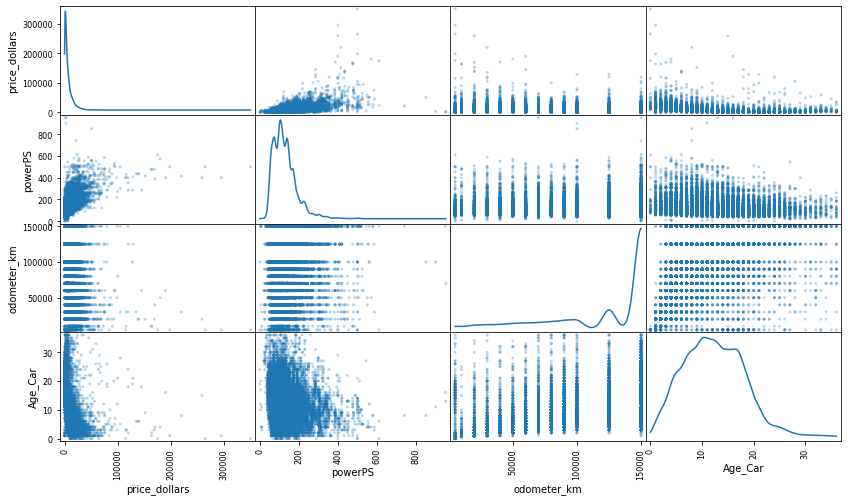

In [156]:
pd.plotting.scatter_matrix(autos_df_1.drop(['postal_code'],axis=1),alpha = 0.3, figsize=(14,8), diagonal = 'kde')

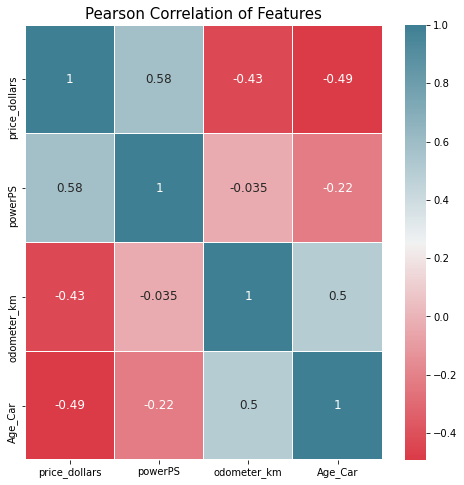

In [157]:
# removing postal code as it's a numerical column but considered as a categorical column in terms of predictive value
corr_matrix = autos_df_1.drop(['postal_code'],axis=1).corr()
plt.figure(figsize=(8,8))
plt.title('Pearson Correlation of Features', size = 15)
colormap = sns.diverging_palette(10,220,as_cmap = True)

sns.heatmap(corr_matrix, 
            cmap = colormap,
            annot = True,
           linewidths = 0.1, vmax = 1.0, linecolor='white',
           annot_kws = {'fontsize':12})
plt.show()

### We observe the following relationships from the correlation matrix:
- There is positive correlation between powerPS and price_dollars: the greater the horse power, the more expensive is the car
- The price of cars and the age are negatively correlated: Newer cars are more expensive
- There is a negative correlation between price of the car and the odometer reading: Cars with more miles/kms are cheaperr
- There is a positive correlation between the odometer reading and the age of the car, i.e. the longer the person has the car, the more miles/kms it was driven
- There is a negative correlation between age of the car and the horse power: Newer cars have greater horse power.

### Low variance features detection: Feature Engineering II

In [158]:
# Even though all the numerical features are correlated with the target 'price_dollars', we are going to run a routine 
# Check of low variance numerical features for elimination
autos_copy_1 = autos_df_1.copy()

# y is price_dollars
cols = ['powerPS','odometer_km','Age_Car']

## It seems that VarianceThreshold only works on numerical columns
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
autos_copy1_variance_threshold = sel.fit_transform(autos_copy_1[cols])

In [159]:
autos_copy1_variance_threshold.shape # Nothing removed as expected

(32813, 3)

As expected, the numerical features ['powerPS','odometer_km','Age_Car'] have high variance and well correlated with the target: price_dollars

## EDA of categorical Features

Advanges of using Predictive Power score over Pearson's correlation
- Prediction Power Score detects non linear relationship
- Finding relationship between non-numeric columns

#### Conversion of 'Postal_code' from numerical (int) column to categorical column 

In [160]:
# Postal code, refering to the location is considered categorical variable
col = 'postal_code'
autos_df_1[col] = autos_df_1[col].astype('category')

In [161]:
autos_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32813 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   seller             32813 non-null  object  
 1   offer_type         32813 non-null  object  
 2   price_dollars      32813 non-null  float64 
 3   abtest             32813 non-null  object  
 4   vehicle_type       32813 non-null  object  
 5   gearbox            32813 non-null  object  
 6   powerPS            32813 non-null  int64   
 7   model              32813 non-null  object  
 8   odometer_km        32813 non-null  float64 
 9   fuel_type          32813 non-null  object  
 10  brand              32813 non-null  object  
 11  unrepaired_damage  32813 non-null  object  
 12  postal_code        32813 non-null  category
 13  Age_Car            32813 non-null  int64   
dtypes: category(1), float64(2), int64(2), object(9)
memory usage: 3.9+ MB


## Predictive Power Score

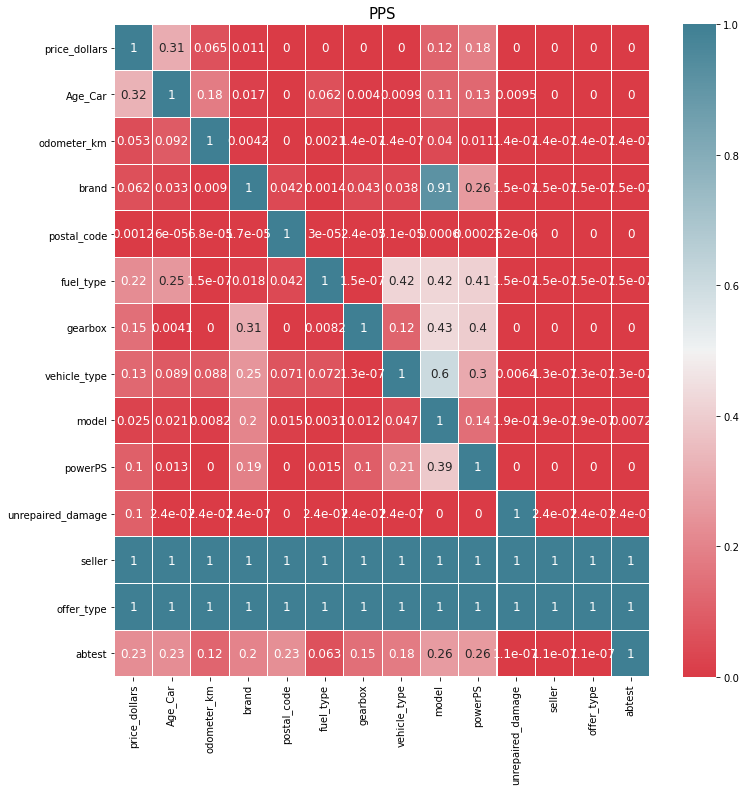

In [162]:
# Predictive Power Score
cols_interest = ['price_dollars','Age_Car','odometer_km','brand','postal_code','fuel_type','gearbox','vehicle_type','model','powerPS','unrepaired_damage','seller','offer_type','abtest']
corr_matrix = pps.matrix(autos_df_1[cols_interest])
plt.figure(figsize=(12,12))
plt.title('PPS', size = 15)
colormap = sns.diverging_palette(10,220,as_cmap = True)

sns.heatmap(corr_matrix, 
            cmap = colormap,
            annot = True,
           linewidths = 0.1, vmax = 1.0, linecolor='white',
           annot_kws = {'fontsize':12})
plt.show()


In [163]:
corr_matrix.loc[:,'price_dollars']

price_dollars        1.000000
Age_Car              0.324637
odometer_km          0.052571
brand                0.061680
postal_code          0.001235
fuel_type            0.224075
gearbox              0.147776
vehicle_type         0.126212
model                0.025471
powerPS              0.103236
unrepaired_damage    0.104637
seller               1.000000
offer_type           1.000000
abtest               0.227838
Name: price_dollars, dtype: float64

We can make the following observations from PPS:
- 'Seller', 'Offer_type' seem to have no relationship with the target or any other: candidate columns to be removed
- 'Unrepaired_damage' has a weak predictive power for 'price', but not vice versa
- 'abtest' has a good predictive power for 'price;, but not vice versa

- In summary, 'Age_Car', 'fuel_type','powerPS','unrepaired_damage','abtest','gearbox','vehicle_type' have strong predictive power, while 'brand','model','odometer' have weaker predictive power!

- 'postal_code' have very low predictive power: candidate column to be removed

In [164]:
def categorical_eda(cols,df):
    """Given cols, generate EDA of categorical data"""
    #print("To check: Unique count of non-numeric data")
    #print(df.select_dtypes(include=['category']).nunique())
 
    # Plot count distribution of categorical data
    for col in cols:
        fig = sns.catplot(x=col, kind="count", data=df)
        fig.set_xticklabels(rotation=45)
        plt.show()

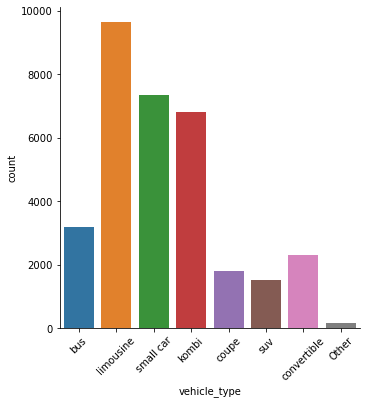

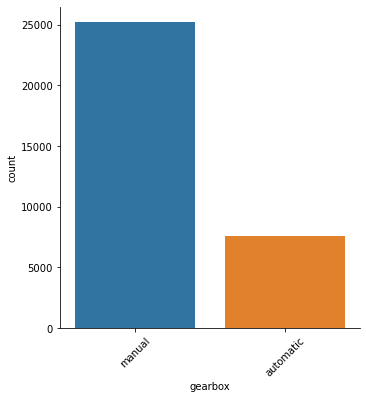

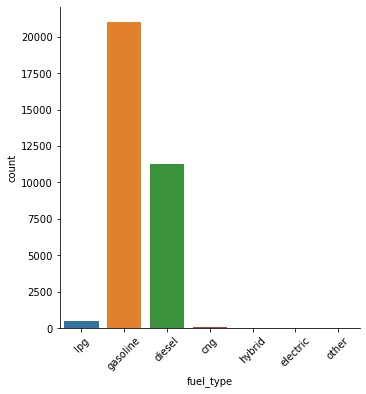

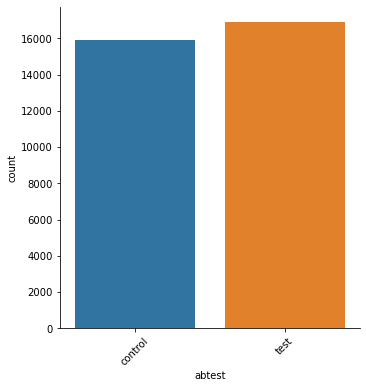

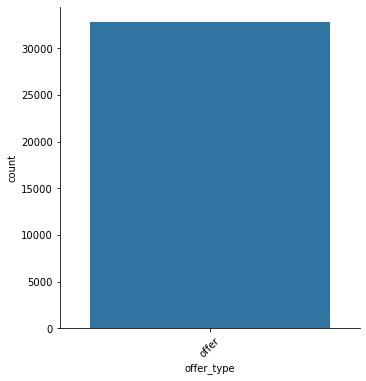

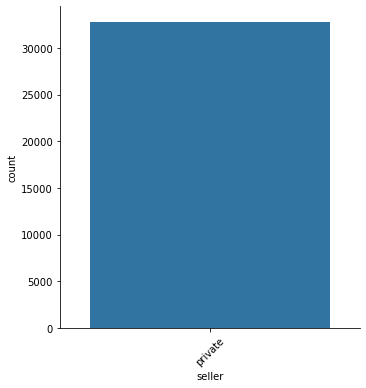

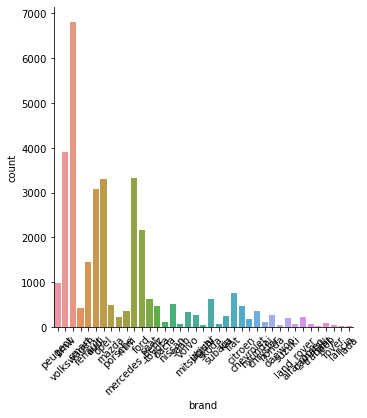

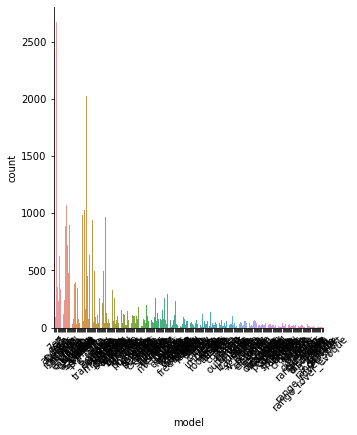

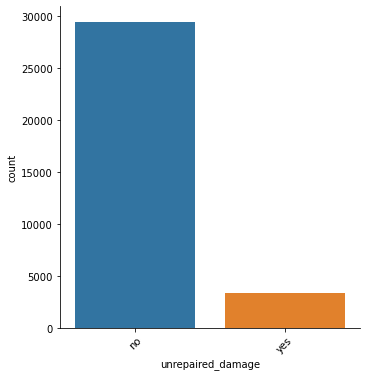

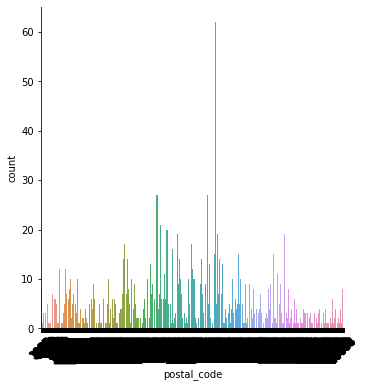

In [165]:
cols = ['vehicle_type','gearbox','fuel_type','abtest','offer_type','seller','brand','model','unrepaired_damage','postal_code']
categorical_eda(cols, autos_df_1)

### Based on the categorical EDA results, we decided the following in regards to feature selection:
- There is only one category in 'Seller' and 'offer_type' and that explains the lack of predictive power from PPS above: columns to be removed
- 'Postal_code' low predictive power as the distribution of the different postal codes look more or less uniform, with low count and that explains the low predictive power. Initial model will be built without postal_code. The contribution of the 'postal_code' will be assessed later eventhough results from PPS indicate that it will poorly contribute to the predictive model as a feature
- For fuel_type, it seems the majority of the listings in this dataset are either gasoline or diesel.. one solution to lump all other categories ['lpg', 'cng','hybrid','electric','other'] into 'other'


#### Lumping categories with weak representation in 'fuel_type' into 'other' category

In [166]:
autos_df_1['fuel_type'] = autos_df_1['fuel_type'].str.replace('cng','other').replace('lpg','other').replace('hybrid','other').replace('electric','other')
autos_df_1['fuel_type'].unique()

array(['other', 'gasoline', 'diesel'], dtype=object)

#### Removing non predictive categorical columns

In [167]:
cols_removed = ['seller','offer_type','postal_code']
autos_df_1.drop(cols_removed,axis = 1, inplace = True)

In [168]:
autos_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32813 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price_dollars      32813 non-null  float64
 1   abtest             32813 non-null  object 
 2   vehicle_type       32813 non-null  object 
 3   gearbox            32813 non-null  object 
 4   powerPS            32813 non-null  int64  
 5   model              32813 non-null  object 
 6   odometer_km        32813 non-null  float64
 7   fuel_type          32813 non-null  object 
 8   brand              32813 non-null  object 
 9   unrepaired_damage  32813 non-null  object 
 10  Age_Car            32813 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 4.3+ MB


# Part I:  Prediction of  cars prices

 ### Conversion of unrepaired_damage (yes/no) to binary with simple transformation

In [169]:
autos_df_1['unrepaired_damage']= autos_df_1['unrepaired_damage'].str.replace('yes','1').replace('no', '0').astype(int)

In [170]:
autos_data = autos_df_1.copy()
autos_prices = autos_data.pop('price_dollars')

In [171]:
len(autos_data['model'].unique())

242

In [172]:
dummy_model = pd.get_dummies(autos_data["model"], prefix="")
autos_data = pd.concat([autos_data, dummy_model], axis=1)
autos_data.drop(['model'],axis = 1,inplace=True)

In [173]:
autos_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32813 entries, 0 to 49999
Columns: 251 entries, abtest to _zafira
dtypes: float64(1), int64(3), object(5), uint8(242)
memory usage: 11.3+ MB


In [174]:
autos_data.shape

(32813, 251)

In [175]:
# One hot encoding of categorical features
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import FeatureUnion

class ColumnSelectTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if not isinstance(X, pd.DataFrame): # if not a dataframe, convert to a data frame...
            X = pd.DataFrame(X) 
        
        #label encoder    
        encoder = LabelEncoder()       
        Xt = encoder.fit_transform(X[self.column]) 
        cols = list(encoder.classes_) 
        
        # One hot encoder
        One_hot = OneHotEncoder(handle_unknown = 'ignore')
        Xtt = One_hot.fit_transform(Xt.reshape(-1,1))
        Xtt = Xtt.toarray()
        
        # Creating new data cols
        i = 0
        for col in cols:
            X[col]=Xtt[:,i]
            i+=1       
        return Xtt # To return a numpy array, not a dataframe

In [176]:
# Categorical Features
from sklearn.pipeline import FeatureUnion

abtest_onehot = Pipeline([
    ('cst', ColumnSelectTransformer(['abtest'])),
])

vehicle_type_onehot = Pipeline([
    ('cst', ColumnSelectTransformer(['vehicle_type'])),
])

gearbox_onehot = Pipeline([
    ('cst', ColumnSelectTransformer(['gearbox'])),
])

brand_onehot = Pipeline([
    ('cst', ColumnSelectTransformer(['brand'])),
])

fuel_onehot = Pipeline([
    ('cst', ColumnSelectTransformer(['fuel_type'])),
])


categorical_features = FeatureUnion([('pipe_onehot1',abtest_onehot), ('pipe_onehot2',vehicle_type_onehot),
                                     ('pipe_onehot3',gearbox_onehot),('pipe_onehot5',fuel_onehot),('pipe_onehot6',brand_onehot)
])

In [177]:
# Numerical features...

numeric_cols = ['Age_Car','powerPS','odometer_km','unrepaired_damage']
            
class ColumnSelectTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if not isinstance(X, pd.DataFrame):# if not a dataframe, convert to a data frame...
            X = pd.DataFrame(X) 
                           
        return X[self.columns].to_numpy()

In [178]:
numeric_features = Pipeline([
    ('cst', ColumnSelectTransformer(numeric_cols)),
])

In [179]:
# Features of 'model' to avoid problems of different 'model' in train and testdata.. 
list_model = list(dummy_model.columns)
list_model.sort()

Model_select_onehot = Pipeline([
    ('cst', ColumnSelectTransformer(list_model)),
])
    

In [180]:
business_features = FeatureUnion([
    ('numeric', numeric_features),
    ('model_features', Model_select_onehot),
    ('categorical', categorical_features)
])

Here in this dataset, due to the existence of 242 models, when the data is split in train and test, they don't distribute equally. In other words, some models will show up in test that were not in train data used to fit the model. That would create a problem. One way around this is to initiate all the business features ahead of fitting the model, specifically the different entries of the 'model' column.

Also, the data has to be 'one hot' encoded for this specific column, in other words, all the variants of 'model' are already in the data before splitting it to train and test as there is no equal/uniform representation of all the variants of the 'model'. Only 'model' creates such problem. All other columns are fine with no one hot encoding and fine being one hot encoded while being fit to the predictive model.  


#### Function of 'Regressor'

In [821]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from pprint import pprint

def regressor_model(X,y,features,regressor):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
    
    business_model = Pipeline([
    
    ('features', features),
    # add your estimator here
    ('regressor',regressor)
     ])

    business_model.fit(X_train,y_train)
    y_pred = business_model.predict(X_test)
    
    

    print('Training R^2:{}'.format(business_model.score(X_train,y_train)))
    print('Test R^2:{}'.format(business_model.score(X_test,y_test)))
    kf = KFold(5, shuffle=True, random_state=1)
    print('MSE: %f' % metrics.mean_squared_error(y_test, y_pred))
    print('MAE: %f' % metrics.mean_absolute_error(y_test, y_pred))
    print('CV R^2:{}'. format(cross_val_score(business_model, autos_data,autos_prices, cv=kf).mean()))
    
    
    #Look at parameters used by our current model: gonna deactivate for now.. but a great feature
    #print('Parameters currently in use:\n')
    #pprint(business_model.get_params())
    

#### Function reload_data

In [771]:
# Reloading the data

def reload_data(data,target):
    
    X = data.copy()
    y = X.pop(target)
    
    return X, y

## Linear Model: Simple Linear Regression model


In [764]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

regressor = Pipeline([('scaler',StandardScaler()), ('regressor',LinearRegression())])
regressor_model(autos_data,autos_prices,business_features,regressor)


Training R^2:0.7047932985664738
Test R^2:-1.0173339986272957e+20
MSE: 10266630454959593451356684288.000000
MAE: 1250727686823.658447
CV R^2:-7.337501667396793e+20


The baseline 'Linear Regression Model' performed poorly with this dataset. The next step is to use an ensemble model

##  Ensemble Model I: Random Forest Regressor

Here, we are using a benchmark plain random forest regressor with the random state set to 0 to ensure compatibility. 
Such simple model would give us an idea whether randomForest Regressor is a good model or not for such dataset.

#### Base Model

In [772]:
regressor = RandomForestRegressor(n_estimators = 10,random_state = 0)
regressor_model(autos_data,autos_prices,business_features,regressor)

Training R^2:0.9570685336369812
Test R^2:0.7777311952513307
MSE: 22430703.024761
MAE: 1522.140672
CV R^2:0.8490750430816817


###  Overfitting Handling
Even though the model performs well (0.86), however, there is a clear overfitting if we compare training and test performance. Regarding 'model', there are 242 models of cars, with some cars being represented rarely in the dataset, this might introduce some noise and overfitting to the model.

In [730]:
len(autos_df_1['model'].unique())

242

In [731]:
#Computing the range of the frequency of the models to get an idea....
model_s = autos_df_1['model'].value_counts(normalize=True, dropna = False).sort_values(ascending = False)
print(model_s.max())
print(model_s.min()) # 1 car out of 47.7k cars... of course, it would introduce noise in the model...... # we can limit 

0.08137018864474446
3.0475726084173955e-05


In [732]:
(model_s.min())*len(autos_df_1)

1.0

As we can see, some categories, have one car only ( out of 32.8k cars). That might be introducing noise and overfitting. 

#### Testing I: Limiting a category representation to 6 cars minimum, otherwise to be assigned to 'other'. 
That reduced the number of features in the model to 222, basically reducing the number of models by 22.

In [733]:
# We can start conservative: by limit it to 6 cars minimum in a a category
Threshold = 0.0002# 6 cars minimum 

a = model_s >= Threshold # model_s sorted in descending order..
common_models = list(model_s[:sum(a)+1].index)
len(common_models) # 222: basically reducing the number of models by 22 (if thresold is 6 cars frequency..  

222

In [735]:
# Reloading the data
autos_data, autos_prices = reload_data(autos_df_1,'price_dollars')


# Lumping all categories of car models 'under threshold' in one category called 'other'
for model_ in autos_data['model'].tolist():
    
    if model_ not in common_models:
       autos_data['model']= autos_data['model'].str.replace(model_,'other')

# Readjusting the dummy variables of 'model' accordingly
dummy_model = pd.get_dummies(autos_data["model"], prefix="")
autos_data = pd.concat([autos_data, dummy_model], axis=1)
autos_data.drop(['model'],axis = 1,inplace=True)

print(autos_data.shape)    

(32813, 233)


In [736]:
# Adjusting model_features accordingly
list_model = list(dummy_model.columns)
list_model.sort()

Model_select_onehot = Pipeline([
    ('cst', ColumnSelectTransformer(list_model)),
]) 

In [737]:
business_features = FeatureUnion([
    ('numeric', numeric_features),
    ('model_features', Model_select_onehot),
    ('categorical', categorical_features)
])    

In [738]:
regressor = RandomForestRegressor(random_state = 0)
regressor_model(autos_data,autos_prices,business_features,regressor)

Training R^2:0.9725808953517873
Test R^2:0.8072040225610551
MSE: 19456393.438528
MAE: 1438.829628
CV R^2:0.8590110608571482


Interestingly, there is a slight improvement in the model performance (by 0.2) when the number of features got reduced.

#### Testing II: Limiting a category representation to 65 cars minimum, otherwise to be assigned to 'other'. 
That reduced the number of features in the model to 185, basically reducing the number of models by 57.

In [739]:
# We can be aggressive: by limit it to 29 cars minimum in a a category
Threshold = 0.0006 # 19 cars #  agressive (0.00060*len(autos_df_1))
a = model_s >= Threshold
common_models = list(model_s[:sum(a)+1].index)
len(common_models) # Reducing the number of models from 242 to 185 only... 

185

In [741]:
# Reloading the data
autos_data, autos_prices = reload_data(autos_df_1,'price_dollars')

# Lumping all categories of car models 'under threshold' in one category called 'other'
for model_ in autos_data['model'].tolist():
    
    if model_ not in common_models:
       autos_data['model']= autos_data['model'].str.replace(model_,'other')

# Readjusting the dummy variables of 'model' accordingly
dummy_model = pd.get_dummies(autos_data["model"], prefix="")
autos_data = pd.concat([autos_data, dummy_model], axis=1)
autos_data.drop(['model'],axis = 1,inplace=True)
print(autos_data.shape)    

# Adjusting model_features accordingly
list_model = list(dummy_model.columns)
list_model.sort()

Model_select_onehot = Pipeline([
    ('cst', ColumnSelectTransformer(list_model)),
]) 
# Adjusting Business Features
business_features = FeatureUnion([
    ('numeric', numeric_features),
    ('model_features', Model_select_onehot),
    ('categorical', categorical_features)
])    


regressor = RandomForestRegressor(random_state = 0)
regressor_model(autos_data,autos_prices,business_features,regressor)

(32813, 198)
Training R^2:0.9721817138077825
Test R^2:0.801129246212837
MSE: 20069441.699452
MAE: 1452.911764
CV R^2:0.8582272237890921


Actually, the model performance was slightly reduced, by very little. That would be a tradeoff. If speeding and reducing complexity is a priority, we can move on with our plans of lumping categorical representation of less than 19 cars in 'other' category, without hurting the model performance by much.


However, the overfitting issue is still present. The most trusted solution for this is hypertuning of the model parameters.

### Dealing with overfitting: Tuning of the hyperparameters

In [742]:
# Reloading the model (with 242 models)

autos_data, autos_prices = reload_data(autos_df_1,'price_dollars')

# Readjusting the dummy variables of 'model' accordingly
dummy_model = pd.get_dummies(autos_data["model"], prefix="")
autos_data = pd.concat([autos_data, dummy_model], axis=1)
autos_data.drop(['model'],axis = 1,inplace=True)
print(autos_data.shape)    

# Adjusting model_features accordingly
list_model = list(dummy_model.columns)
list_model.sort()

Model_select_onehot = Pipeline([
    ('cst', ColumnSelectTransformer(list_model)),
]) 
# Adjusting Business Features
business_features = FeatureUnion([
    ('numeric', numeric_features),
    ('model_features', Model_select_onehot),
    ('categorical', categorical_features)
])    

(32813, 251)


To come up with the range of hypertuning parameters, each of the model hyperparamters is tuned separately by roughly testing the range of values. Once a value is identified, a more thorough search for the optimum value is performed. 

In [818]:
param_grid = {'max_depth':[20, 30, 40, 50, 60, 70, 80, 90, 100, None],
              'min_samples_leaf': range(1,4), # default 1
              'min_samples_split': range(2,7), # default 2
              'n_estimators':range(100,500,50), # 
              'max_features':['log2','sqrt','auto']}

In [836]:
# Random Search
from tempfile import mkdtemp
from shutil import rmtree

def hypertune_model_random(X,y,business_features,regressor,param_grid):
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

    cachedir = mkdtemp()

    random_search = RandomizedSearchCV(regressor, param_grid, cv=5,n_jobs = None,n_iter= 30, verbose = 1)

    business_model = Pipeline([
    ('features', business_features),
    # add your estimator here
    ('random_search',random_search)
    ])

    business_model.fit(X_train,y_train)
    rmtree(cachedir)

    print('Training R^2:{}'.format(business_model.score(X_train,y_train)))
    print('Test R^2:{}'.format(business_model.score(X_test,y_test)))
    print('Cross Validation (CV) R^2:{}'.format(business_model.named_steps['random_search'].best_score_))
    print(business_model.named_steps['random_search'].best_params_)

In [820]:
regressor = RandomForestRegressor(random_state = 0)
hypertune_model_random(autos_data,autos_prices,business_features,regressor,param_grid)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 76.3min finished


Training R^2:0.9366961219055862
Test R^2:0.8003665843830249
Cross Validation (CV) R^2:0.8444256154645732
{'n_estimators': 450, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 80}


#### GridSearch

In [826]:
from tempfile import mkdtemp
from shutil import rmtree

def hypertune_model_grid(X,y,business_features,regressor,param_grid):
    

    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

   

    cachedir = mkdtemp()

 
    grid_search = GridSearchCV(regressor, param_grid, cv=5,n_jobs = None, verbose = 1)


    business_model = Pipeline([
    ('features', business_features),
    
    ('grid_search',grid_search)
    ])


    business_model.fit(X_train,y_train)
    rmtree(cachedir)


    print('Training R^2:{}'.format(business_model.score(X_train,y_train)))
    print('Test R^2:{}'.format(business_model.score(X_test,y_test)))
    print('Cross Validation (CV) R^2:{}'.format(business_model.named_steps['grid_search'].best_score_))
    print(business_model.named_steps['grid_search'].best_params_)

In [ ]:
# GridSearchCV.. Takes 5.5 days... 
regressor = RandomForestRegressor(random_state = 0)
hypertune_model_grid(autos_data,autos_prices,business_features,regressor,param_grid)

The grid search would require 200X extra computation. This route will be taken if further optimization and tuning of the hyperparameters of RF is necessary.
### Building and Fitting the model

In [830]:
regressor = RandomForestRegressor(n_estimators = 450, min_samples_leaf = 2 , min_samples_split = 5,max_features ='auto',max_depth = 80, random_state = 0)
regressor_model(autos_data,autos_prices,business_features,regressor)

Training R^2:0.9366961219055862
Test R^2:0.8003665843830249
MSE: 20146407.250385
MAE: 1435.545372
CV R^2:0.8504409832461809


The model with tuned hyperparamters performed slightly better than the base model (85.3% versus 84.9%). 

## Feature Importance

In [833]:
# List of Features used in the model after OHE of the categorical variables
list_abtest = list(autos_data['abtest'].unique())
list_abtest.sort()

list_vehicle_type = list(autos_data['vehicle_type'].unique())
list_vehicle_type.sort()

list_gearbox = list(autos_data['gearbox'].unique())
list_gearbox.sort()

list_brand = list(autos_data['brand'].unique())
list_brand.sort()

list_fuel = list(autos_data['fuel_type'].unique())
list_fuel.sort()

features_list = numeric_cols + list_model + list_abtest + list_vehicle_type + list_gearbox + list_fuel + list_brand
print(len(features_list))
#print(features_list)

300


In [834]:
# EnsembleModel+FeatureImportance Function

def ensemble_model_FeatImp(X,y,features_transformer,regressor,features_list,num_features_imp):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
    
    business_model = Pipeline([
    
    ('features', features_transformer),
    # add your estimator here
    ('regressor',regressor)
     ])

    business_model.fit(X_train,y_train)
    y_pred = business_model.predict(X_test)
    
    importances = business_model['regressor'].feature_importances_
    indices = np.argsort(importances)[::-1] # descending order
    # Print the feature ranking
    print("Feature ranking:")

    for f in range(len(features_list[:num_features_imp])):
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
    feat_imp = pd.Series(business_model['regressor'].feature_importances_, features_list).sort_values(ascending=False)[:20]
    feat_imp.plot(kind='bar', title='Feature Importances',)
    plt.ylabel('Feature Importance Score')  
       

Feature ranking:
1. feature 0 (0.391452)
2. feature 1 (0.301452)
3. feature 29 (0.167857)
4. feature 2 (0.056957)
5. feature 250 (0.007465)
6. feature 220 (0.007053)
7. feature 281 (0.004455)
8. feature 3 (0.003392)
9. feature 262 (0.002922)
10. feature 257 (0.002557)


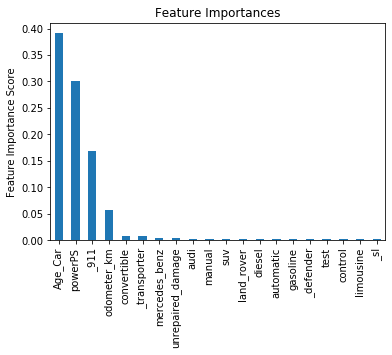

In [837]:
regressor = RandomForestRegressor(n_estimators = 450, min_samples_leaf = 2 , min_samples_split = 5,max_features ='auto',max_depth = 80, random_state = 0)
num_features_imp = 10
ensemble_model_FeatImp(autos_data,autos_prices,business_features,regressor,features_list,num_features_imp)

## Ensemble Model II: Gradient Boosting Regressor

In [838]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor(random_state = 0)
regressor_model(autos_data,autos_prices,business_features,regressor)

Training R^2:0.8875550063707595
Test R^2:0.7984145368520172
MSE: 20343402.049128
MAE: 1661.326761
CV R^2:0.823858562348369


We are going to deal with overfitting with hypertuning the model.

### Tuning of the hyperparameters

Adopted from
https://github.com/aarshayj/analytics_vidhya/blob/master/Articles/Parameter_Tuning_GBM_with_Example/GBM%20model.ipynb

### First hypertuning the Tree specific parameters
* min_samples_split
* min_samples_leaf
* max_depth
* min_leaf_nodes
* max_features
* loss function

### Boosting parameters
* n_estimators
* learning rate
* subsample

Roughly, the range of each hyperparameter was determined separately via randomized search. Then, all the tree specific parameters ranges were passed together in a new randomized Search... Later, this process is repeated for a learning rate of 0.01

In [842]:
param_grid = {'max_depth':[3,4,5,6,7,8,9,10,None], 
              'min_samples_leaf': range(1,6), #(2,6)
              'min_samples_split': range(2,10),#(6,10)
              'n_estimators':range(200,600,50), 
              'subsample':np.arange(0.7,0.9,0.05), 
              'max_features':['log2','sqrt','auto']}

regressor = GradientBoostingRegressor(random_state = 0)
hypertune_model_random(autos_data,autos_prices,business_features,regressor,param_grid)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 140.9min finished


Training R^2:0.9277154583232667
Test R^2:0.8207977097638786
Cross Validation (CV) R^2:0.8473405932528181
{'subsample': 0.8500000000000001, 'n_estimators': 350, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 8}


Hypertuning of the GradientBoostingRegressor improved the model performance from 0.82 to 0.84 (CV error). We are gonna changing the learning rate of the GradientBoostingRegressor to improve the performance even further.

### Approach for tackling the problem
* Tune the tree specific parameters for high learning rate
* Tune subsample
* Lower learning rate as much as possible computationally and increase the number of estimators accordingly.

In [843]:
# Repeating the hypertuning of the model, while making sure the learning rate is 0.1
regressor = GradientBoostingRegressor(learning_rate = 0.1, random_state = 0)
hypertune_model_random(autos_data,autos_prices,business_features,regressor,param_grid)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 86.4min finished


Training R^2:0.9483306289903748
Test R^2:0.8128741659518541
Cross Validation (CV) R^2:0.8481884003954369
{'subsample': 0.9000000000000001, 'n_estimators': 450, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10}


### Tuning the learning rate

#### Step I
halving the learning rate, doubling the n_estimators

In [845]:
regressor = GradientBoostingRegressor(learning_rate = 0.05, n_estimators = 450, min_samples_leaf = 4 , min_samples_split = 4,max_features ='sqrt',max_depth = 10,subsample=0.9, random_state = 0)
regressor_model(autos_data,autos_prices,business_features,regressor)

Training R^2:0.9337737919192337
Test R^2:0.8126738057451841
MSE: 18904399.278341
MAE: 1391.081511
CV R^2:0.8514860092151156


#### Step II

In [846]:
regressor = GradientBoostingRegressor(learning_rate = 0.025, n_estimators = 450, min_samples_leaf = 4 , min_samples_split = 4,max_features ='sqrt',max_depth = 10,subsample=0.9, random_state = 0)
regressor_model(autos_data,autos_prices,business_features,regressor)

Training R^2:0.9175333878815846
Test R^2:0.8137601503628147
MSE: 18794768.628515
MAE: 1420.540625
CV R^2:0.8510737805829166


It seems that decreasing learning rate lower than 0.05 would lead to diminishing returns. So, learning rate of 0.05 seems optimum for such a model.

### Plotting features Importance

Feature ranking:
1. feature 0 (0.242045)
2. feature 1 (0.238288)
3. feature 2 (0.133604)
4. feature 29 (0.093786)
5. feature 287 (0.053792)
6. feature 256 (0.021753)
7. feature 257 (0.021698)
8. feature 258 (0.019938)
9. feature 251 (0.015160)
10. feature 250 (0.013042)


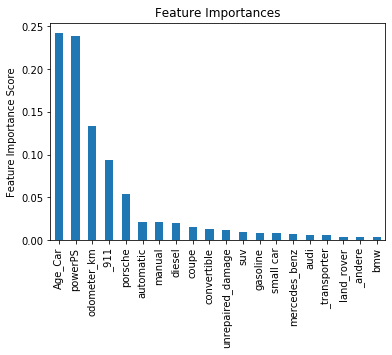

In [848]:
regressor = GradientBoostingRegressor(learning_rate = 0.05, n_estimators = 450, min_samples_leaf = 4 , min_samples_split = 4,max_features ='sqrt',max_depth = 10,subsample=0.9, random_state = 0)
num_features_imp = 10
ensemble_model_FeatImp(autos_data,autos_prices,business_features,regressor,features_list,num_features_imp)

Interestingly, there is a match in feature importances ranked via either RandomForrest Regressor or GradientBoosting Regressor model. 

### Eliminating low frequency categories in 'model' by lumping them in other

In [849]:
#Computing the range of the frequency of the models to get an idea....
model_s = autos_df_1['model'].value_counts(normalize=True, dropna = False).sort_values(ascending = False)

# We can start conservative: by limit it to 6 cars minimum in a a category

Threshold = 0.0002# 6 cars minimum 
a = model_s >= Threshold
common_models = list(model_s[:sum(a)+1].index)
len(common_models) # 222: basically reducing the number of models by 22 (if thresold is 6 cars frequency..  

# Reloading the data
autos_data = autos_df_1.copy()
autos_prices = autos_data.pop('price_dollars')

# Lumping all categories of car models 'under threshold' in one category called 'other'
for model_ in autos_data['model'].tolist():
    
    if model_ not in common_models:
       autos_data['model']= autos_data['model'].str.replace(model_,'other')

# Readjusting the dummy variables of 'model' accordingly
dummy_model = pd.get_dummies(autos_data["model"], prefix="")
autos_data = pd.concat([autos_data, dummy_model], axis=1)
autos_data.drop(['model'],axis = 1,inplace=True)
print(autos_data.shape)    

# Adjusting model_features accordingly
list_model = list(dummy_model.columns)
list_model.sort()

Model_select_onehot = Pipeline([
    ('cst', ColumnSelectTransformer(list_model)),
]) 
# Adjusting Business Features
business_features = FeatureUnion([
    ('numeric', numeric_features),
    ('model_features', Model_select_onehot),
    ('categorical', categorical_features)
])    


# Retraining the model( with prior hyperparameters) with new features
regressor = GradientBoostingRegressor(learning_rate = 0.05, n_estimators = 450, min_samples_leaf = 4 , min_samples_split = 4,max_features ='sqrt',max_depth = 10,subsample=0.9, random_state = 0)
regressor_model(autos_data,autos_prices,business_features,regressor)

(32813, 233)
Training R^2:0.9345728778541187
Test R^2:0.8233330665963887
MSE: 17828698.552424
MAE: 1375.543818
CV R^2:0.854929948417982


The model performance did not degrade one the low frequency categories of model were lumped in 'other' category. It actually slightly improved. So, it is something to consider if computation cost is a concern.

## Conclusion

After a series of feature engineering consisting of: 1.extracting information from 'year', 2. eliminating irrelevant columns, 3. eliminating low variance columns (either numerical or categorical) 4. eliminating columns with low predictive power, we were able to reduce the model from 19 features to 10 features, which greater reduces the model complexity and speeds up computation time. 

This dataset needed serious data cleaning due the following facts: 1. Many missing data 2. Erroneous values of 0 and others. A conservative approach of eliminating missing rows and rows of erroneous data was chosen in this case to avoid introducing noise and inaccuracy to the predictive model ###(Solution I). 

Such decision reduced the number of observations from 50k to 32.8k. We chose Solution I for such project. 

A baseline model of linear regression performed poorly. The performance of ensemble models was significantly greater as the validation error in the case of a. RandomForrest, 0.85 and b. GradientBoosting, 0.85. Interestingly, there is a match in the ranking of top 2 features importance for prediction among these 2 models. 


Interestingly, the model performance of GradientBoosting Regressor did not degrade one the low frequency categories of model were lumped in 'other' category. It actually slightly improved. So, it is something to consider if computation cost is a concern.

# Part II: Quantitative Analysis/Data Visualization

## Identification of  the most common brands

In [854]:
# To know the most common brand 
autos['brand'].value_counts(normalize=True).sort_values(ascending = False) 

volkswagen        0.21374
opel              0.10922
bmw               0.10858
mercedes_benz     0.09468
audi              0.08566
ford              0.06958
renault           0.04808
peugeot           0.02912
fiat              0.02616
seat              0.01882
skoda             0.01572
mazda             0.01514
nissan            0.01508
smart             0.01402
citroen           0.01402
toyota            0.01234
sonstige_autos    0.01092
hyundai           0.00976
volvo             0.00914
mini              0.00848
mitsubishi        0.00812
honda             0.00798
kia               0.00712
alfa_romeo        0.00658
porsche           0.00588
suzuki            0.00586
chevrolet         0.00566
chrysler          0.00362
dacia             0.00258
daihatsu          0.00256
jeep              0.00220
subaru            0.00218
land_rover        0.00198
saab              0.00160
daewoo            0.00158
trabant           0.00156
jaguar            0.00154
rover             0.00138
lancia      

## Top brand/Most Popular brand criteria: greater than 1.5% of the listings 

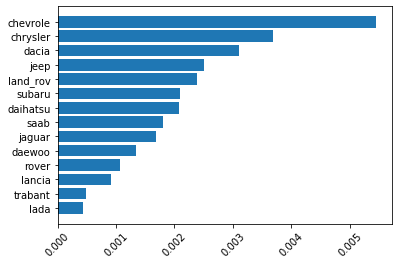

In [1128]:
brand_top = autos_df_viz['brand'].value_counts(normalize=True).sort_values(ascending = True) 
a = brand_top >= 0.015
top_brands = list((brand_top[:sum(a)+1].index))
top_brands_nameadj = [top_brands[i][:8] for i in range(len(top_brands))]
plt.barh(top_brands_nameadj, brand_top[:sum(a)+1])
plt.xticks(rotation=45)
plt.show()

Volkswagen is the most popular brand in Germany based on its frequency of listings in Used Car ads on Craigslist. It is followed by other German brands such as bmw,mercedes_benz, opel and audi. 

## Average Price of Top Brands

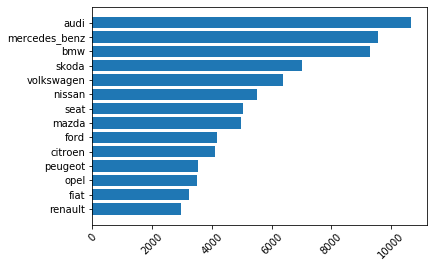

In [1004]:
autos_brand_meanprice = autos_df_viz.groupby('brand')['price_dollars'].mean()
brand_s = autos_df_viz['brand'].value_counts(normalize=True, dropna = False).sort_values(ascending = False)
a = brand_s >= 0.015
top_brands = list(brand_s[:sum(a)+1].index)

#Sort 
mean_price_top_brands = []
for brand in top_brands:
    mean_price_top_brands.append(autos_brand_meanprice[brand])

  
top_brand_av_price_tup = list((zip(top_brands,mean_price_top_brands)))
top_brand_av_price_tup.sort(key = lambda x: x[1])   


top_brand_sorted    = [top_brand_av_price_tup[i][0] for i in range(len(top_brand_av_price_tup))]
av_price_top_sorted = [top_brand_av_price_tup[i][1] for i in range(len(top_brand_av_price_tup))]

# Plot
plt.barh(top_brand_sorted,av_price_top_sorted)
plt.xticks(rotation=45)
plt.show()

For the most common/popular cars on the Used Car listing, the most expensive car was audi and it costs around $10000

As expected, smaller cars with moderate price have the greater mileage, meaning they are more used for commute or on a frequent basis than other cars.

## Average mileage for top brand

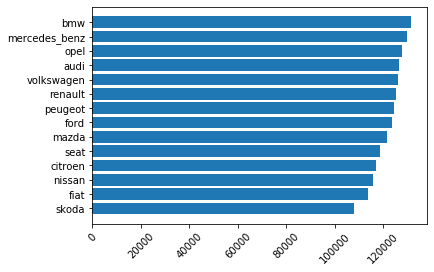

In [1006]:
# Sorting
mean_mileage_top_brands = []
for brand in top_brands:
    mean_mileage_top_brands.append(autos_brand_meanmileage[brand])



    
top_brand_av_mileage_tup = list((zip(top_brands,mean_mileage_top_brands)))
top_brand_av_mileage_tup.sort(key = lambda x: x[1])   


top_brand_sorted      = [top_brand_av_mileage_tup[i][0] for i in range(len(top_brand_av_mileage_tup))]
av_mileage_top_sorted = [top_brand_av_mileage_tup[i][1] for i in range(len(top_brand_av_mileage_tup))]





plt.barh(top_brand_sorted,av_mileage_top_sorted)
plt.xticks(rotation=45)
plt.show()

Most of the most common cars in general have the same mileage. That explains that odometer did not have a high predictor value. 

## Average 'Age_Car' of top brands

The 'oldest' car on the listing is trabant and on average it's 25 years old! The other 'older' brands on the list on average are between 10-15 y old.

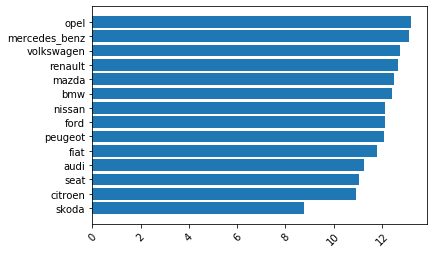

In [1008]:
mean_age_top_brands = []
for brand in top_brands:
    mean_age_top_brands.append(autos_brand_meanage[brand])

top_brand_av_age_tup = list(zip(top_brands,mean_age_top_brands))
top_brand_av_age_tup.sort(key = lambda x: x[1])   


top_brand_sorted      = [top_brand_av_age_tup[i][0] for i in range(len(top_brand_av_age_tup))]
av_age_top_sorted     = [top_brand_av_age_tup[i][1] for i in range(len(top_brand_av_age_tup))]


plt.barh(top_brand_sorted,av_age_top_sorted)
plt.xticks(rotation=45)
plt.show()

It seems on average people who own the popular cars, like to own them for 10-12 years. 

### Mileage and Price for top brands

In [914]:
### Mileage and Price for top brands
# converting both dictionaries to series
top_brand_av_price_series = pd.Series(dict_top_brand_av_price)
top_brand_av_mileage_series = pd.Series(dict_top_brand_av_mileage)
top_brand_av_age_series = pd.Series(dict_top_brand_av_age)
top_brand_df = pd.DataFrame(top_brand_av_price_series, columns = ['mean_price'])
top_brand_df['mean_mileage'] = top_brand_av_mileage_series
top_brand_df['mean_age'] = top_brand_av_age_series
top_brand_df

,mean_price,mean_mileage,mean_age
volkswagen,6383.984297,126191.664221,12.744497
bmw,9280.318391,131419.057377,12.429559
mercedes_benz,9546.299488,129585.718590,13.133173
opel,3513.458371,127649.106873,13.217075
audi,10673.227140,126439.960950,11.259030
ford,4163.641274,123418.744229,12.122807
renault,2968.984754,125225.225225,12.671518
peugeot,3540.584615,124451.282051,12.083077
fiat,3252.243490,113815.104167,11.786458
seat,5043.371248,118412.322275,11.047393


## Categories representation among the top brands

#### 1. Abtest

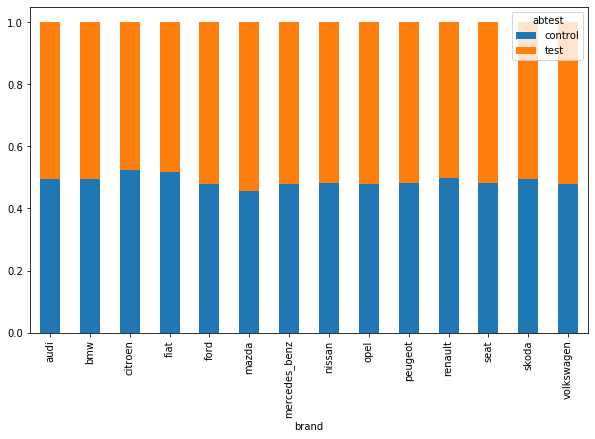

In [915]:
grouping_top = autos_df_viz.groupby('brand')['abtest'].value_counts(normalize = True)
grouping_top.loc[top_brands].unstack().plot(kind='bar', stacked = True, figsize=(10,6))
plt.show()

#### 2. gearbox

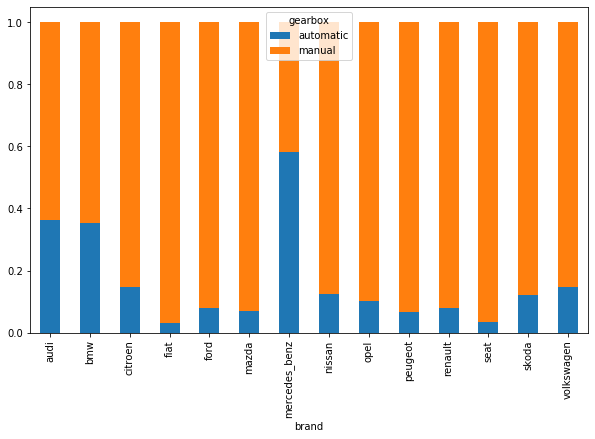

In [921]:
grouping_top = autos_df_viz.groupby('brand')['gearbox'].value_counts(normalize = True)
grouping_top.loc[top_brands].unstack().plot(kind='bar', stacked = True, figsize=(10,6))
plt.show()

#### 3. vehicle_type

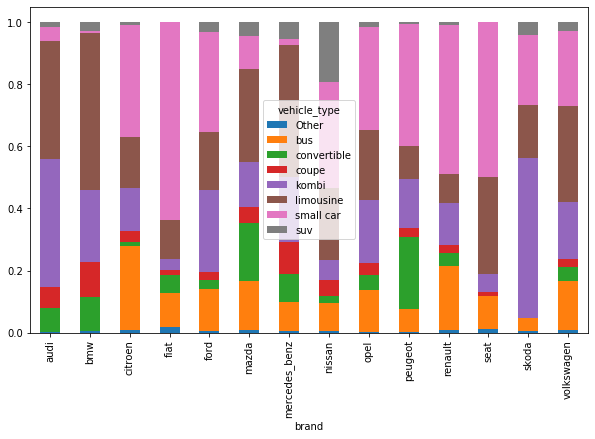

In [923]:
grouping_top = autos_df_viz.groupby('brand')['vehicle_type'].value_counts(normalize = True)
grouping_top.loc[top_brands].unstack().plot(kind='bar', stacked = True, figsize=(10,6))
plt.show()
# It seems that there is a wide distribution of different vehicle_types, among the most popular brands ranging from small car, to convertible to SUV.... 

#### 4. fuel_type

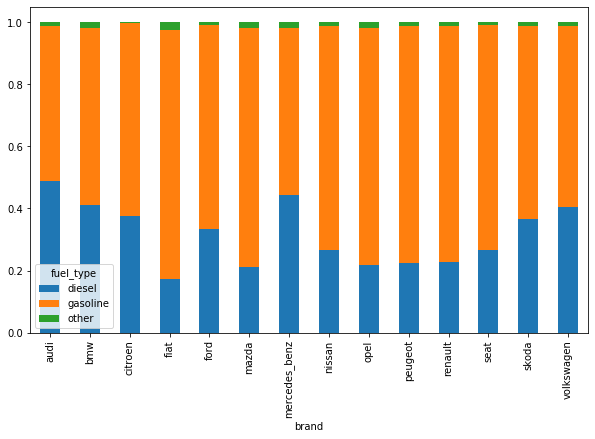

In [924]:
grouping_top = autos_df_viz.groupby('brand')['fuel_type'].value_counts(normalize = True)
grouping_top.loc[top_brands].unstack().plot(kind='bar', stacked = True, figsize=(10,6))
plt.show()
# It seems that there is a predominance of vehicles with gasoline, as fuel, among the most popular brands.

## Most popular brand-model combo

In [927]:
# Combination of brand and model that's most common
df_brand_model = autos_df_viz.groupby(['brand','model'])['price_dollars'].count().sort_values(ascending = False)
top_brand_model_l = list(df_brand_model.index)
percent_top_brand_model = ((df_brand_model.to_list())/np.sum(df_brand_model.to_list()))*100
a = percent_top_brand_model >= 1.5
top_brands_models = top_brand_model_l[:sum(a)+1]
display(top_brands_models)

[('volkswagen', 'golf'),
 ('bmw', '3er'),
 ('volkswagen', 'polo'),
 ('opel', 'corsa'),
 ('volkswagen', 'passat'),
 ('opel', 'astra'),
 ('audi', 'a4'),
 ('mercedes_benz', 'c_klasse'),
 ('bmw', '5er'),
 ('mercedes_benz', 'e_klasse'),
 ('audi', 'a6'),
 ('audi', 'a3'),
 ('ford', 'focus'),
 ('ford', 'fiesta'),
 ('volkswagen', 'transporter'),
 ('peugeot', '2_reihe')]

## Average numeric features of brands

#### A. Av Price per brand

Text(0, 0.5, 'price $')

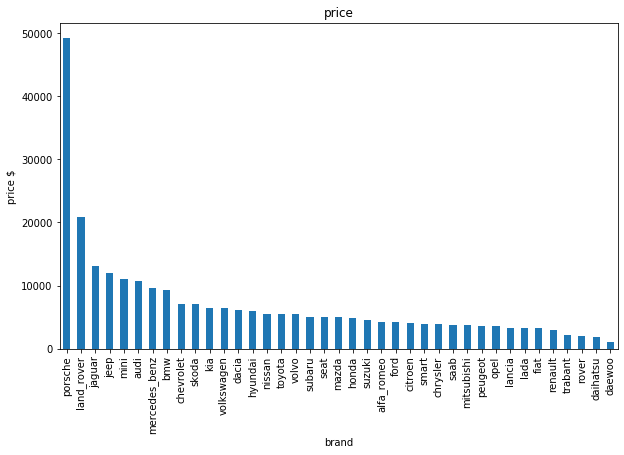

In [1058]:
grouping_brand_price = autos_df_1.groupby('brand')['price_dollars'].mean().sort_values(ascending = False)
grouping_brand_price.plot(kind='bar', stacked = True, figsize=(10,6))
plt.title('price')
plt.ylabel('price $')

#### B. Av PowerPS per brand

Text(0, 0.5, 'power PS')

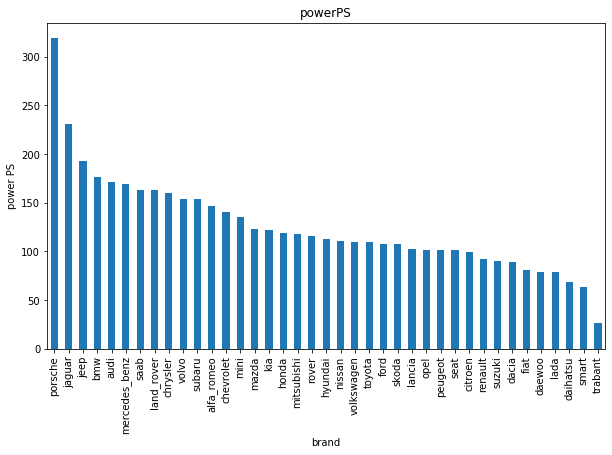

In [1059]:
grouping_brand_power = autos_df_1.groupby('brand')['powerPS'].mean().sort_values(ascending = False)
grouping_brand_power.plot(kind='bar', stacked = True, figsize=(10,6))
plt.title('powerPS')
plt.ylabel('power PS')

#### C. Av Mileage per brand

Text(0, 0.5, 'mileagee [km]')

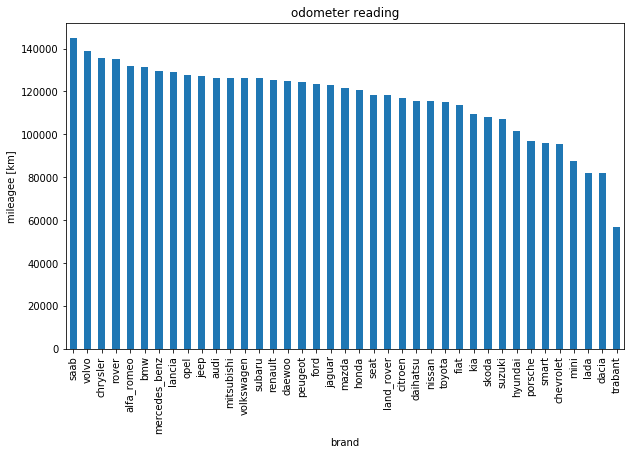

In [1060]:
grouping_brand_odom = autos_df_1.groupby('brand')['odometer_km'].mean().sort_values(ascending = False)
grouping_brand_odom.plot(kind='bar', stacked = True, figsize=(10,6))
plt.title('odometer reading')
plt.ylabel('mileagee [km]')

#### D. Av Age per brand

Text(0, 0.5, 'Age [ys]')

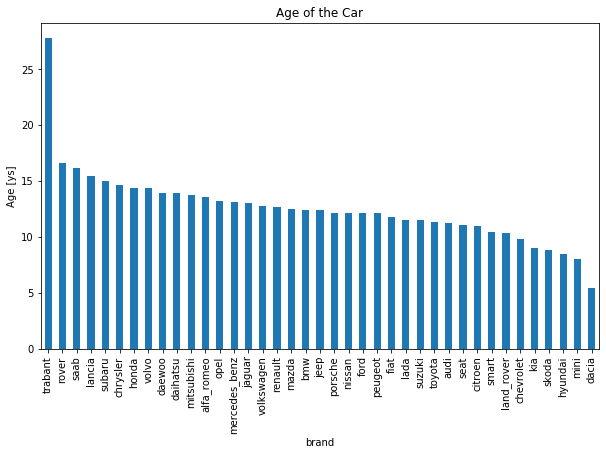

In [1061]:
grouping_brand_age = autos_df_1.groupby('brand')['Age_Car'].mean().sort_values(ascending = False)
grouping_brand_age.plot(kind='bar', stacked = True, figsize=(10,6))
plt.title('Age of the Car')
plt.ylabel('Age [ys]')

#### E. Av yearly mileage [odometer/age]  per brand

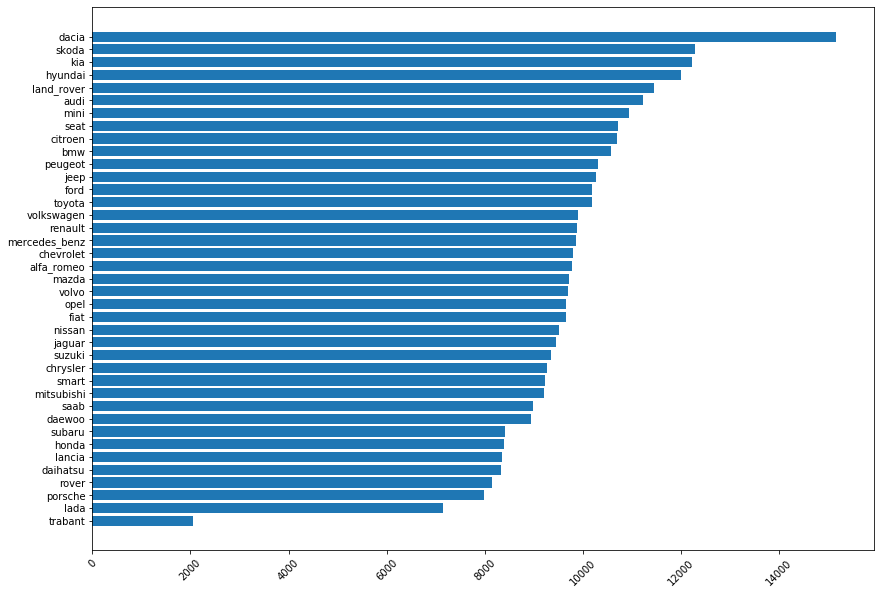

In [1068]:
# odometer
grouping_av_brand = list(grouping_brand_odom.index)
grouping_av_age  = grouping_brand_odom.to_list()



brand_av_odom_tup = list((zip(grouping_av_brand,grouping_av_odom )))
brand_av_odom_tup.sort(key = lambda x: x[0])   


brand_sorted_odom    = [brand_av_odom_tup[i][0] for i in range(len(brand_av_odom_tup))]
odom_sorted     = [brand_av_odom_tup[i][1] for i in range(len(brand_av_odom_tup))]

# Age
grouping_av_brand = list(grouping_brand_age.index)
grouping_av_age  = grouping_brand_age.to_list()



brand_av_age_tup = list((zip(grouping_av_brand,grouping_av_age )))
brand_av_age_tup.sort(key = lambda x: x[0])   


brand_sorted_age    = [brand_av_age_tup[i][0] for i in range(len(brand_av_age_tup))]
age_sorted     = [brand_av_age_tup[i][1] for i in range(len(brand_av_age_tup))]


# same order for brand_sorted_age and brand_sorted
assert brand_sorted_age == brand_sorted_odom

# define: yearly mileage[km]
yearly_mileage = np.array(odom_sorted)/np.array(age_sorted)

# Sorting
brand_mileage_tup = list(zip(brand_sorted_age,yearly_mileage))
brand_mileage_tup.sort(key = lambda x: x[1])   

brand_sorted             = [brand_mileage_tup[i][0] for i in range(len(brand_mileage_tup))]
brand_mileage_sorted     = [brand_mileage_tup[i][1] for i in range(len(brand_mileage_tup))]

plt.figure(figsize =(14,10))
plt.barh(brand_sorted ,brand_mileage_sorted)
plt.xticks(rotation=45)
plt.show()

In general, cheaper cars such as hyndai, dacia, kia.. are used more during their ownership than more expensive cars such as jaguar, mercedes, porsche. 

### Grouping the odometer data into Buckets to detect a relationship with price_dollars

In [930]:
bins = [0, 100000, 125000, 150000]
autos_df_viz['odometer_bin'] = pd.cut(autos_df_viz['odometer_km'],bins)
np.histogram(autos_df_viz['odometer_km'],bins)

(array([ 7408,  1536, 23869]), array([     0, 100000, 125000, 150000]))

In [931]:
autos_df_viz.groupby('odometer_bin')['price_dollars'].mean()

odometer_bin
(0, 100000]         12701.101744
(100000, 125000]     6768.514607
(125000, 150000]     4312.875956
Name: price_dollars, dtype: float64

The clear relationship which is obvious is that car with lower mileage are listed for higher price. 

# Part III. Unsupervised Learning: Used Cars Market segmentation by product

Following an unsupervised approach to analyze the data would allow us to reveal hidden and new patterns in the data. The analysis of the UsedCars data is indeed useful for both consumers and manufacturers as following:

- Manufactures: The business leaders would have an idea of how the car is used: how long the consumer tends to keep the car before buying a new one, how many miles on average the car is used for a certain period. A very useful piece of data would be a conversion of 'postal code' data to 'rural'and 'urban' and comparing the pattern of the car usage and selling behavior between the 2 areas. Knowing the car usage information would help the manufactures make decision on ensuring the car performance is optimized for the average duration of car usage. 

- Consumers: this dataset is imperative to help some consumers decide on whether to lease or to buy a car. It is important to know how much price is influenced by the Age and by the mileage of the car. Based on the consumer's usage of the car, this data will help him/her decide the car with the best value of the money.

### Algorithm: GMM ( Gaussian Mixture Models)
The model attempts to find a mixture of multi-dimentional Gaussian probability Distributions. As shown in the pairplot above, 'Age_Car' distribution is more or less normal. 'powerPS'and 'Odometer' are skewed distributions and 'unrepaire_damage' is a numerical column 0 or 1 with an underlying categorical representation. Inspite this, we are gonna attempt using the GMM model for clustering as our first model of choice. A more refined approach would involve transforming some of the numeric features to normal using log transformation or BoxCox transforrmation for instance.

In [181]:
numeric_features

Pipeline(steps=[('cst',
                 ColumnSelectTransformer(columns=['Age_Car', 'powerPS',
                                                  'odometer_km',
                                                  'unrepaired_damage']))])

In [182]:
#Let's start by clustering only based on the numerical features
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

scores = {}
for i in range(2,7):
    clustering_model = Pipeline([('scaler',StandardScaler()), ('clust',GaussianMixture(random_state=42, n_components=i))])

    business_model = Pipeline([
      ('features', numeric_features),
    # add your estimator here
      ('estimator',clustering_model)
     ])

    X = autos_data
    
    business_model.fit(X)
    
    preds = business_model.predict(X)

   # Find the cluster centers
    centers = business_model['estimator']['clust'].means_

   # silhouette score
    good_data_t = scaler.fit_transform(X[numeric_cols])
    score = silhouette_score(good_data_t, preds)
    scores[i] = score
    print('Silhouette score is: ' + str(score), '\n')
    
print('Scores: ' + str(scores))
    

Silhouette score is: 0.4770485560881343 

Silhouette score is: 0.33904335849650125 

Silhouette score is: 0.32957817773068765 

Silhouette score is: 0.19641667577470273 

Silhouette score is: 0.17947477945743323 

Scores: {2: 0.4770485560881343, 3: 0.33904335849650125, 4: 0.32957817773068765, 5: 0.19641667577470273, 6: 0.17947477945743323}


### Elbow Plot

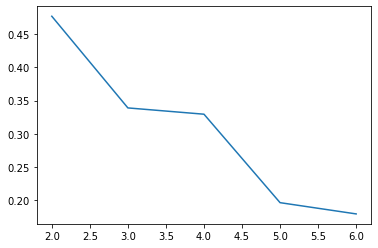

In [183]:
scores_l = [scores[i] for i in range(2,7)]
cluster_size = list(range(2,7))
plt.plot(cluster_size,scores_l)

Based on the elbow plot, the error drop drastically once the number of clusters increases to 5. Therefore, I decided to pick 5 clusters for GMM clustering approach.

In [184]:
# After deciding that 5 clusters is the best option
clusterer = GaussianMixture(random_state = 42, n_components = 5)
cols = ['Age_Car','powerPS','odometer_km','unrepaired_damage']
clusterer.fit(good_data_t)

# predict the cluster/label for each data point
preds = clusterer.predict(good_data_t)


# Find the cluster centers
centers = clusterer.means_
print('Cluster Center:' + str(centers))
 

Cluster Center:[[-0.14695008 -0.1357579   0.02475074 -0.33725322]
 [ 0.31638351  0.0047112   0.65461425 -0.33725322]
 [ 0.453616   -0.22530155  0.29831187  2.96513109]
 [-1.09485471 -0.13415794 -1.51076804 -0.33725322]
 [ 0.1422479   0.87981122 -1.35976297 -0.33725322]]


### Inverse Standarization

In [185]:
# Inverse Standardization: Mapping the centers to the non_normalized data
true_centers = scaler.inverse_transform(centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(true_centers))]
#true_centers_df = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers_df = pd.DataFrame(np.round(true_centers), columns = ['Age_Car','powerPS','odometer_km','unrepaired_damage'])
true_centers_df.index = segments
display(true_centers_df)

,Age_Car,powerPS,odometer_km,unrepaired_damage
Segment 0,11.0,121.0,125000.0,0.0
Segment 1,14.0,130.0,150000.0,0.0
Segment 2,15.0,115.0,135858.0,1.0
Segment 3,6.0,121.0,64054.0,0.0
Segment 4,13.0,185.0,70047.0,-0.0


In [186]:
# To label data
# To properly concatenate without changing the indices
clusters_s = pd.Series(preds)
clusters_s.index = autos_data.index

labelled_data = pd.concat([autos_df_1, clusters_s], axis=1)
labelled_data.rename(columns={0: 'clusters_labels'}, inplace = True)

grouping_clusters = labelled_data.groupby('clusters_labels')['price_dollars'].mean()

In [187]:
price_clusters = labelled_data.groupby('clusters_labels')['price_dollars'].mean()
price_clusters_df = pd.DataFrame(price_clusters,columns=['price_dollars'])
price_clusters_df.index = segments
true_centers_df = pd.concat([true_centers_df,price_clusters_df], axis = 1)
display(true_centers_df)

,Age_Car,powerPS,odometer_km,unrepaired_damage,price_dollars
Segment 0,11.0,121.0,125000.0,0.0,6831.987070
Segment 1,14.0,130.0,150000.0,0.0,4607.527919
Segment 2,15.0,115.0,135858.0,1.0,2498.525515
Segment 3,6.0,121.0,64054.0,0.0,12414.484474
Segment 4,13.0,185.0,70047.0,-0.0,16044.871895


### Visualizing the clusters on the data with reduced dimensions  (2)
Numerical dimensions used in the model = 4. 

<AxesSubplot:xlabel='tsne1', ylabel='tsne2'>

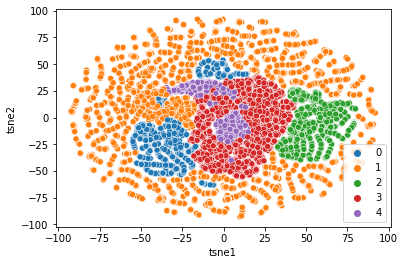

In [188]:
from sklearn.manifold import TSNE
#t-SNE is based on a stochastic (random) process, that is why I set the random_state so we could repeat the result
tsne = TSNE(random_state=0)
tsne_results = tsne.fit_transform(good_data_t) 
tsne_results=pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])
sns.scatterplot(data = tsne_results, x = 'tsne1', y = 'tsne2', hue= preds,palette="tab10")

The clustering pattern reveals a lot of overlap between the clusters. Mapping the clusters into the different categories would enable to reveal the dominant category in each cluster, if any. 

### Distinctive representation of numerical features between clusters
We have 4 features used for clustering: 'Age_Car', 'powerPS', 'odometer' and 'Unrepaired_damage'
We are also mapping the clusters on the 'price_dollars' (not used in the clustering model) to see the price separation resulting from features separation between clusters.

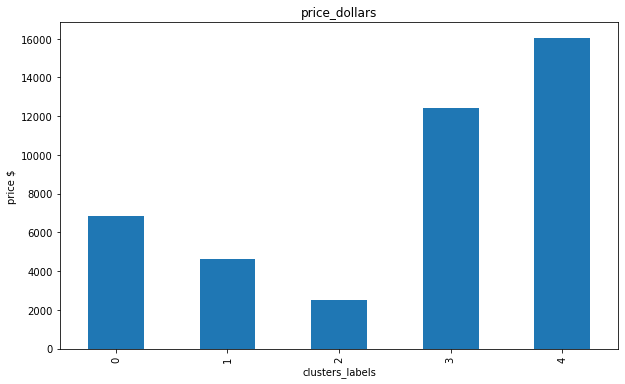

In [189]:
grouping_clusters = labelled_data.groupby('clusters_labels')['price_dollars'].mean()
grouping_clusters.plot(kind='bar', stacked = True, figsize=(10,6))
plt.ylabel('price $')
plt.title('price_dollars')
plt.show()

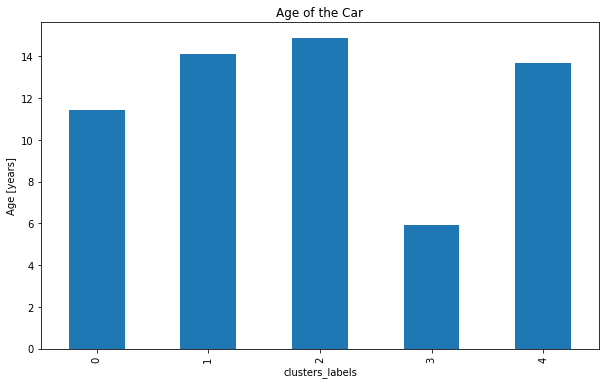

In [190]:
grouping_clusters = labelled_data.groupby('clusters_labels')['Age_Car'].mean()
grouping_clusters.plot(kind='bar', stacked = True, figsize=(10,6))
plt.ylabel('Age [years]')
plt.title('Age of the Car')
plt.show()

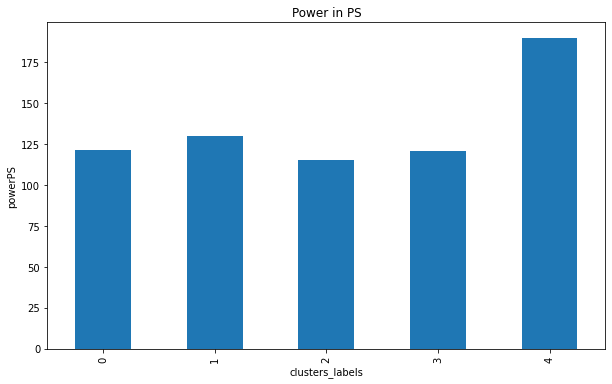

In [191]:
grouping_clusters = labelled_data.groupby('clusters_labels')['powerPS'].mean()
grouping_clusters.plot(kind='bar', stacked = True, figsize=(10,6))
plt.ylabel('powerPS')
plt.title('Power in PS')
plt.show()

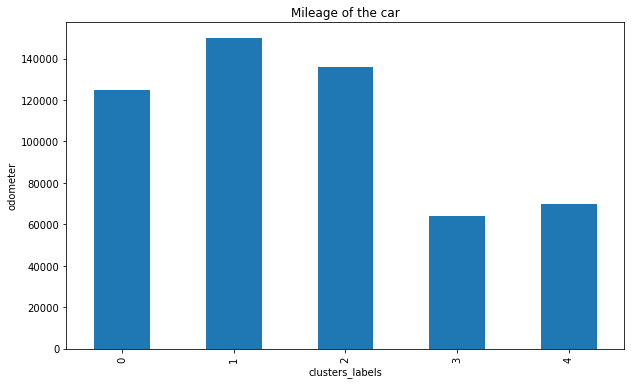

In [192]:
grouping_clusters = labelled_data.groupby('clusters_labels')['odometer_km'].mean()
grouping_clusters.plot(kind='bar', stacked = True, figsize=(10,6))
plt.ylabel('odometer')
plt.title('Mileage of the car')
plt.show()

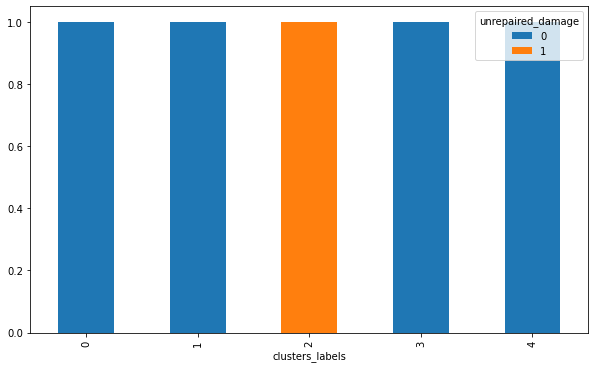

In [193]:
# Unrepaired damage is like categorical variable..
grouping_clusters = labelled_data.groupby('clusters_labels')['unrepaired_damage'].value_counts(normalize = True)
grouping_clusters.unstack().plot(kind='bar', stacked = True, figsize=(10,6))
plt.show()

## Observations & Insights

- It seems that the first 3 clusters represent cars are different than the last 2... Interestingly, enough, all the cars of unrepaired damage are lumped together in one cluster.. cluster 2 with the lowest price and oldest category.

- For Group I, cluster 0 to cluster 2, it seems that the main determinant is first: unrepaired damage as it separates clusters 0,1 from 2 from clusters 3 & 4.

- Age of the car and Odometer both separate cluster 0 from cluster 1, cars in cluster 1 are cheaper due to greater mileage and older age.

- Group II: cars in clusters 3 & 4: clearly separated from Group I by price (expensive) and odometer (low mileage), cars in cluster 4 separated from cars in cluster 3 by greater power and older Age...

- Cars in cluster 3 is the youngest in age and expensive, but not very high powerPS.

- Cars 4 is the group with high power, older and expensive price. The low mileage, despite the high Age of the car, suggests that these cars are not driven much. The cars are probably used for Leisure or belong to owners who live in the city ( we don't have location data yet derived from postal code). However, the high power weaken the probability of urban areas and suggests more that their cars bought for leisure and racing. So powerPS seems to be the price determinant in Group II cars.

####  Conclusions
* On average, selling the car after 6 years, will sell for double the price than after 11 years, as short car ownership period seems to be tightly correlated with low mileage/half
* A category of cars though.. are owned for longer duration (~13 y), however, not driven as much ( same mileage as owning the car for 6 ys)
* BUT they have high PS.. Seems to be race cars... driven for leisure by their owner.. and that explain the low mileage. 

- Our analysis of categorical features below will give us more clues about the characteristics of cars in cluster 4.

### Distinctive representation of categories between clusters
We have 4 categories: 'fuel_type', 'vehicle_type', 'gearbox' and 'Abtest'. 'Model' and 'brand' are categories with so many entries, which make it hard to visualize. Such categories can be lumped into simpler categories to gain insight.
We are gonna analyze to further understand the separation between the cars belonging to the 5 clusters

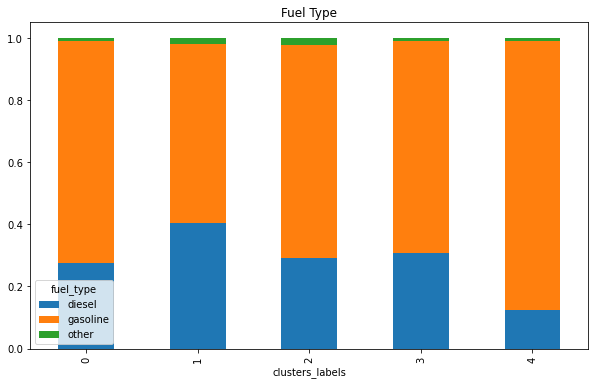

In [194]:
# To properly concatenate without changing the indices
clusters_s = pd.Series(preds)
clusters_s.index = autos_data.index

labelled_data = pd.concat([autos_df_1, clusters_s], axis=1)
labelled_data.rename(columns={0: 'clusters_labels'}, inplace = True)

grouping_clusters = labelled_data.groupby('clusters_labels')['fuel_type'].value_counts(normalize = True)
grouping_clusters.unstack().plot(kind='bar', stacked = True, figsize=(10,6))
plt.title('Fuel Type')
plt.show()

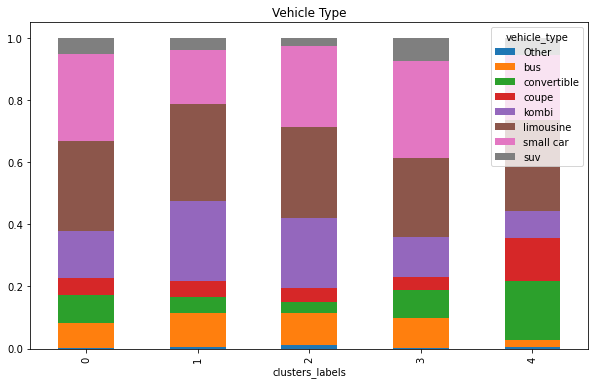

In [195]:
grouping_clusters = labelled_data.groupby('clusters_labels')['vehicle_type'].value_counts(normalize = True)
grouping_clusters.unstack().plot(kind='bar', stacked = True, figsize=(10,6))
plt.title('Vehicle Type')
plt.show()

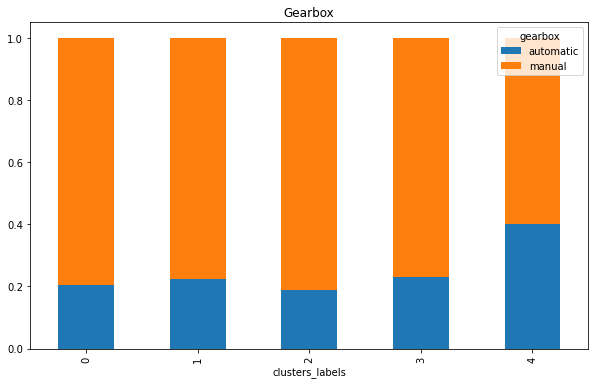

In [196]:
grouping_clusters = labelled_data.groupby('clusters_labels')['gearbox'].value_counts(normalize = True)
grouping_clusters.unstack().plot(kind='bar', stacked = True, figsize=(10,6))
plt.title('Gearbox')
plt.show()

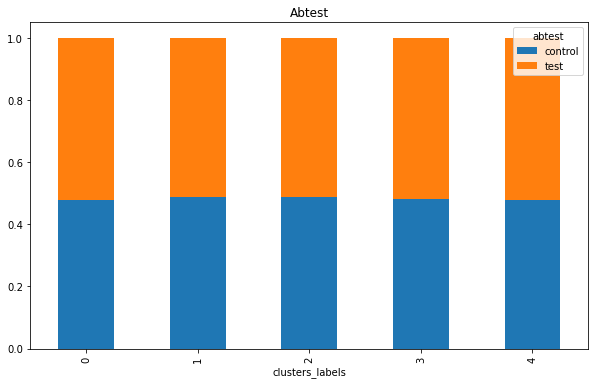

In [197]:
grouping_clusters = labelled_data.groupby('clusters_labels')['abtest'].value_counts(normalize = True)
grouping_clusters.unstack().plot(kind='bar', stacked = True, figsize=(10,6))
plt.title('Abtest')
plt.show()
# Abtest show no difference between the clusters.....

- The following categorical features: 'Fuel Type', 'Gearbox', 'Vehicle Type' separate the cars in the different clusters and give us interesting hints and clues about cars in clusterr 4.

- Cars in cluster 4 have:
* Higher percentage of cars with Gasoline for fuel than all other clusters.
* Higher percentage of cars with  Manual gear than all other clusters.
* Higher percentage of cars [couple: red] and [ convertible: green] than all other clusters.

- The characteristics of a lot of the cars in cluster 4 confirm our interpretation that cars in this category are race cars used for leisure, not for commute. It seems that cars in this category still hold value even after long ownership.

### Interactive Visualization of cars types

Using plotly interactive plot features, we are gonna further dig in our conclusions about the Used Car market in Germany. 

We picked 2 dominant car types from cluster 3 &4: coupe and convertible and contrasted them with a car type, 'small car' that shows up uniformly across the clusters. 

We are contrasting the numeric features of interest: price of the car, mileage [km], Age of the car and power [PS] simultaneously between the 3 car types to highlight the differences revealed by the unsupervised learning approach/clustering. 

In [205]:
import plotly.io as pio

pio.renderers
pio.renderers.default = "svg"

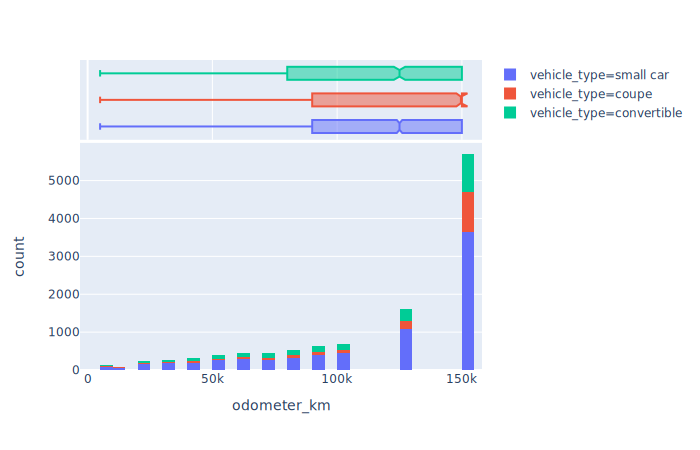

In [199]:
# To display the distribution of price, odometer, age of 
import plotly.express as px

def animate_marg(data,indices,category,features,variable):

    data_select = data[indices]
    fig = px.histogram(data_select, x = variable, color = category, marginal = 'box')
    fig.show("svg")



data = autos_data
features= ['coupe','convertible','small car']
category = 'vehicle_type'
indices = autos_data[category].isin(features)
variable = 'odometer_km'
 

animate_marg(data,indices,category,features,variable)

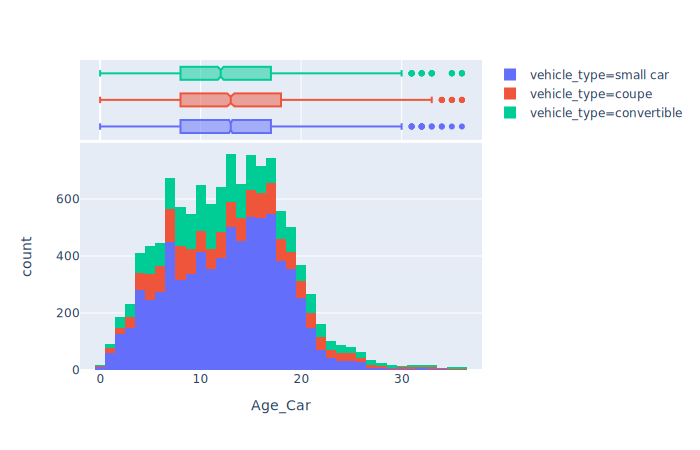

In [200]:
data = autos_data
features= ['coupe','convertible','small car']
category = 'vehicle_type'
indices = autos_data[category].isin(features)
variable = 'Age_Car'

animate_marg(data,indices,category,features,variable)

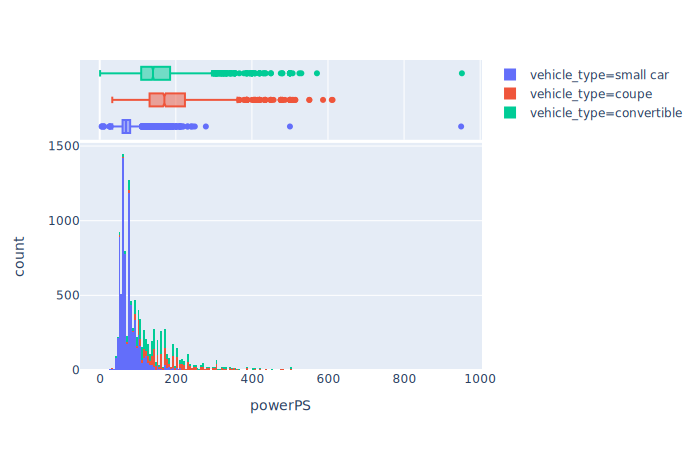

In [211]:
data = autos_data
features= ['coupe','convertible','small car']
category = 'vehicle_type'
indices = autos_data[category].isin(features)
variable = 'powerPS'

animate_marg(data,indices,category,features,variable)

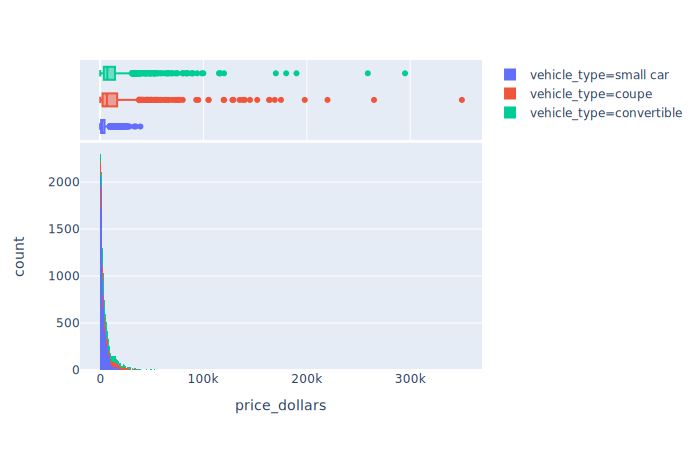

In [208]:
is_coupe_or_convertible_or_small = autos_data['vehicle_type'].isin(['coupe','convertible','small car'])
autos_prices_select = autos_df_1[is_coupe_or_convertible_or_small]
fig = px.histogram(autos_prices_select, x = 'price_dollars', color = 'vehicle_type', marginal = 'box')
fig.show('svg')

In [ ]:
is_coupe_or_convertible_or_small = autos_data['vehicle_type'].isin(['coupe','convertible','small car'])
autos_data_select = autos_df_1[is_coupe_or_convertible_or_small]
fig = px.scatter(autos_data_select, x = 'Age_Car',  y = 'price_dollars', color = 'vehicle_type',
                 marginal_x = 'box', marginal_y = 'violin')

fig.show('svg')

In [ ]:
# To facet that..
fig = px.scatter(autos_data_select, x="Age_Car", y="price_dollars", color = 'vehicle_type', facet_row="vehicle_type",
                  marginal_y="box")
fig.show('svg')

In [100]:
fig = px.scatter(autos_data_select, x="odometer_km", y="price_dollars", color = 'vehicle_type', facet_row="vehicle_type",
                  marginal_y="box")
fig.show()

In [ ]:
fig = px.scatter(autos_data_select, x="powerPS", y="price_dollars", color = 'vehicle_type', facet_row="vehicle_type",
                  marginal_y="box")
fig.show('svg')


### Data visualization conclusions
The conclusions drawn from these visualizations are confirmations to the insights inferred from the clustering results:

- 'coupe' and 'convertible' are two car types that occur more in cluster 3&4 in comparison to their occurence in all the other clusters. We also picked a car type occuring uniformly across all clusters such as 'small car.'

The 'coupe' and 'convertible' cars have similar range of 'Age of the Car' and 'odometer'. However, their prices are more shifted to a higher median/mean. The main difference is the powerPS between the three car types. The coupe and convertible cars have higher power than the 'small car' as expected and that correlate better with the price range difference between them.  

In conclusion, the 'coupe' and 'convertible' cars hold their value longer as 'power of the cars' seem to be a strong determinant of the car price given a similar age and mileage. So it is absolutely not a bad investment for the consumer, in terms of the fun and leisure of driving them and the ability to sell them 10-15 ys later. 
